# Laboratory work #1
For beginning importing libraries.

In [1]:
# Import scikit-learn libraries
# Import preprocessing lib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Import help function
from sklearn.utils.multiclass import type_of_target
from  sklearn.model_selection import train_test_split, GridSearchCV
# Import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
# Import models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import other libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

#### Downloading Dataset
Our dataset is Possible Asteroid Impacts with Earth (from [kaggle](https://www.kaggle.com/datasets/nasa/asteroid-impacts))

## Preprocessing Dataset

In [2]:
# Loading dataset to pandas DataFrame
asteroid_df = pd.read_csv("../input/datasets/asteroid_dataset/asteroid_classification.csv")

In [3]:
# Getting data from dataframe
print(asteroid_df.head())
# Getting names of column
print("==>Column names<==")
print(f"=>asteroid columns: {asteroid_df.columns.tolist()}")
# Getting size of dataset
print("==>Dataset size<==")
print(f"asteroid shape={asteroid_df.shape}")

    Object Name Object Classification  Epoch (TDB)  Orbit Axis (AU)  \
0      433 Eros         Amor Asteroid        57800           1.4579   
1    719 Albert         Amor Asteroid        57800           2.6385   
2    887 Alinda         Amor Asteroid        57800           2.4787   
3  1036 Ganymed         Amor Asteroid        57800           2.6628   
4     1221 Amor         Amor Asteroid        57800           1.9191   

   Orbit Eccentricity  Orbit Inclination (deg)  Perihelion Argument (deg)  \
0              0.2226                  10.8277                   178.8050   
1              0.5479                  11.5822                   156.1409   
2              0.5671                   9.3561                   350.3482   
3              0.5338                  26.6929                   132.4690   
4              0.4356                  11.8795                    26.6572   

   Node Longitude (deg)  Mean Anomoly (deg)  Perihelion Distance (AU)  \
0              304.3265            31

In [4]:
# Getting info from dataframe
print(asteroid_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Object Classification                     15635 non-null  object 
 2   Epoch (TDB)                               15635 non-null  int64  
 3   Orbit Axis (AU)                           15635 non-null  float64
 4   Orbit Eccentricity                        15635 non-null  float64
 5   Orbit Inclination (deg)                   15635 non-null  float64
 6   Perihelion Argument (deg)                 15635 non-null  float64
 7   Node Longitude (deg)                      15635 non-null  float64
 8   Mean Anomoly (deg)                        15635 non-null  float64
 9   Perihelion Distance (AU)                  15635 non-null  float64
 10  Aphelion Distance (AU)            

In [5]:
# Drop unnecessary columns for analysis from the dataframe
asteroid_df.drop(["Object Name", "Epoch (TDB)", "Perihelion Argument (deg)", "Node Longitude (deg)",
                          "Mean Anomoly (deg)", "Perihelion Distance (AU)", "Aphelion Distance (AU)",
                          "Minimum Orbit Intersection Distance (AU)", "Orbital Reference"], axis=1, inplace=True)
print(asteroid_df.columns)

Index(['Object Classification', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Orbital Period (yr)', 'Asteroid Magnitude'],
      dtype='object')


In [6]:
# Drop null values of dataframe as we have only one null value
asteroid_df.dropna(inplace=True)
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15634 entries, 0 to 15634
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object Classification    15634 non-null  object 
 1   Orbit Axis (AU)          15634 non-null  float64
 2   Orbit Eccentricity       15634 non-null  float64
 3   Orbit Inclination (deg)  15634 non-null  float64
 4   Orbital Period (yr)      15634 non-null  float64
 5   Asteroid Magnitude       15634 non-null  float64
dtypes: float64(5), object(1)
memory usage: 855.0+ KB


In [7]:
# Drop the 90% of data in dataframe
asteroid_df_size = asteroid_df.size
asteroid_df = asteroid_df[:int(asteroid_df_size*0.1)]

In [8]:
# Get the description of the dataframe
print(asteroid_df.describe())

       Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
count      9380.000000         9380.000000              9380.000000   
mean          1.786934            0.456994                13.701426   
std           0.599254            0.175598                11.841897   
min           0.547600            0.006200                 0.021000   
25%           1.323325            0.330500                 5.054750   
50%           1.747150            0.467850                 9.792850   
75%           2.221950            0.579025                19.876325   
max          17.818700            0.969500               154.375100   

       Orbital Period (yr)  Asteroid Magnitude  
count          9380.000000         9380.000000  
mean              2.485915           21.578613  
std               1.400086            3.056270  
min               0.410000            9.450000  
25%               1.520000           19.300000  
50%               2.310000           21.200000  
75%              

In [9]:
# View class names
print(set(asteroid_df["Object Classification"]))

{'Amor Asteroid (Hazard)', 'Apohele Asteroid', 'Apollo Asteroid (Hazard)', 'Apohele Asteroid (Hazard)', 'Amor Asteroid', 'Aten Asteroid', 'Apollo Asteroid', 'Aten Asteroid (Hazard)'}


In [10]:
# View count of class names
print(asteroid_df.iloc[:, 0].value_counts())

Apollo Asteroid              3918
Amor Asteroid                3484
Apollo Asteroid (Hazard)     1157
Aten Asteroid                 609
Aten Asteroid (Hazard)        130
Amor Asteroid (Hazard)         71
Apohele Asteroid                8
Apohele Asteroid (Hazard)       3
Name: Object Classification, dtype: int64


In [11]:
# Change class names
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Apollo Asteroid" ,
                                          "Apollo", inplace=True)
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Aten Asteroid",
                                          "Aten", inplace=True)
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Amor Asteroid",
                                          "Amor", inplace=True)
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Apohele Asteroid",
                                          "Apohele", inplace=True)
# Drop unnecessary class
necessary_class = ["Apollo", "Aten", "Amor"]
asteroid_df = asteroid_df[asteroid_df["Object Classification"].isin(necessary_class)]

In [12]:
# View class names
print(set(asteroid_df["Object Classification"]))

{'Amor', 'Apollo', 'Aten'}


In [13]:
# View count of class names
print(asteroid_df.iloc[:, 0].value_counts())

Apollo    3918
Amor      3484
Aten       609
Name: Object Classification, dtype: int64


In [14]:
print(asteroid_df["Object Classification"].head())
print(asteroid_df.info())

0    Amor
1    Amor
2    Amor
3    Amor
4    Amor
Name: Object Classification, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 9380
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object Classification    8011 non-null   object 
 1   Orbit Axis (AU)          8011 non-null   float64
 2   Orbit Eccentricity       8011 non-null   float64
 3   Orbit Inclination (deg)  8011 non-null   float64
 4   Orbital Period (yr)      8011 non-null   float64
 5   Asteroid Magnitude       8011 non-null   float64
dtypes: float64(5), object(1)
memory usage: 438.1+ KB
None


## Creating functions for visualise data

In [15]:
def boxplot_data(dataframe, features, target_features):
    """Function to show boxplot of dataframe;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features name from dataframe;
    :param target_features: number of target feature.
    """
    # Define plot variables
    n = len(features)
    cols = 3
    rows = int(n/cols)
    features_iter = 0

    # Build plot
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 23))
    for i in range(rows):
        for j in range(cols):
            if features_iter == target_features:
                features_iter += 1
                continue
            sns.boxplot(x=features[target_features], y=features[features_iter], data=dataframe, ax=ax[i][j])
            features_iter += 1

    plt.show()

def remove_outliers(dataframe, features):
    """Function to remove the outliers;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features from dataframe.
    """
    # Copy dataframe to another variable
    dataframe_copy = dataframe.copy()

    # Iterate through features
    for feature in features:
        if dataframe[feature].dtype == object:
            continue
        # Calculate q1, q3 and iqr
        q3 = dataframe[feature].quantile(0.75)
        q1 = dataframe[feature].quantile(0.25)
        iqr = q3 - q1

        # Get local minimum and maximum
        local_min = q1 - (1.5 * iqr)
        local_max = q3 + (1.5 * iqr)

        # Remove the outliers
        dataframe_copy = dataframe_copy[(dataframe_copy[feature] >= local_min) &
                                        (dataframe_copy[feature] <= local_max)]

    return dataframe_copy

def histogram_data(dataframe, features):
    """Function to show histogram of dataframe;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features from dataframe.
    """
    # Define plot variables
    features_count = len(features)

    # Build plot
    for i in range(features_count):
        sns.displot(x=features[i], data=dataframe)
    plt.show()


## Visualising Dataset

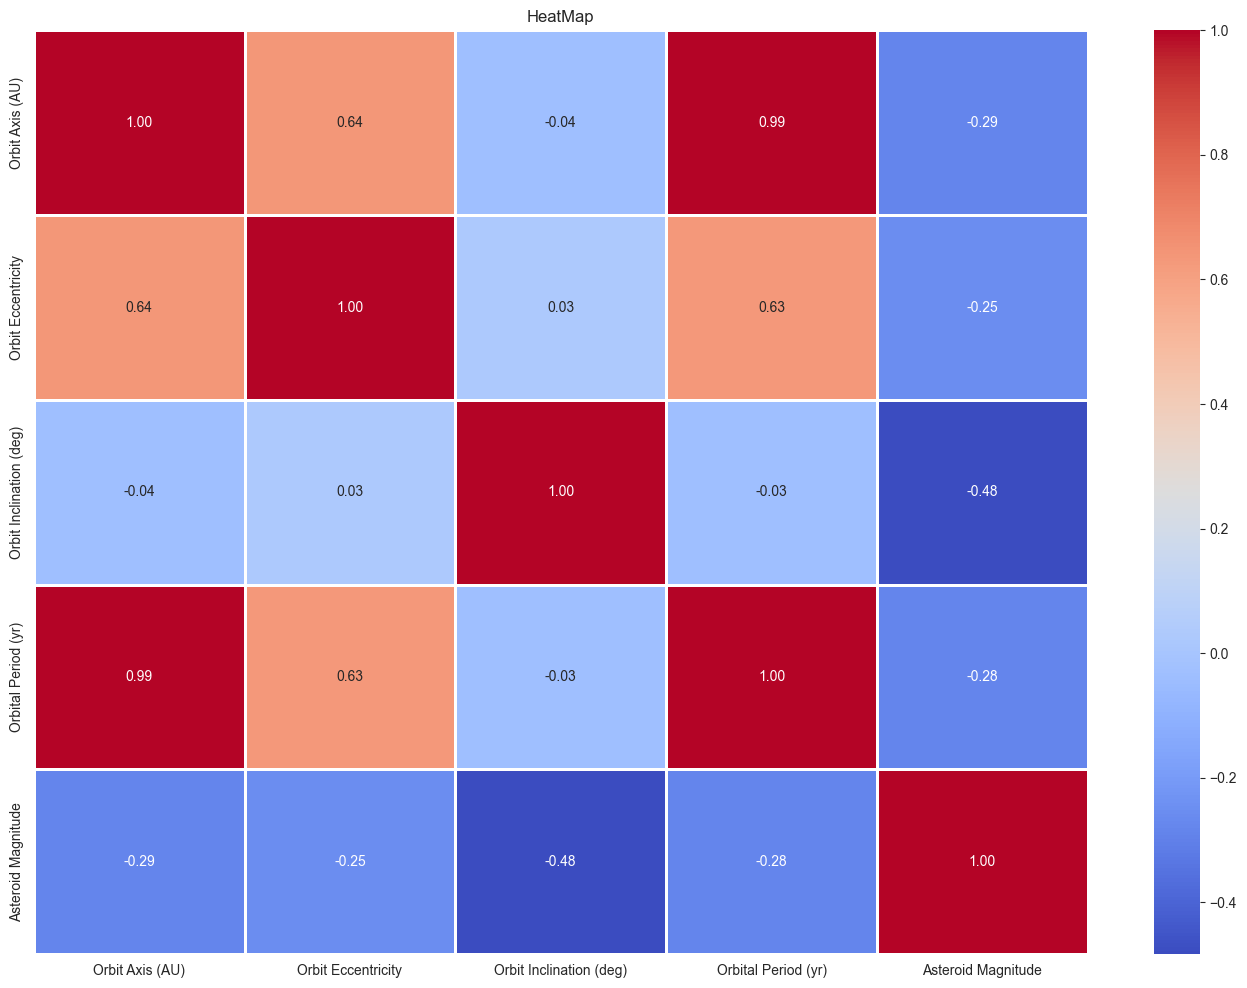

In [16]:
# Visualising with heatmap
plt.figure(figsize=(17, 12))
heat_map = sns.heatmap(asteroid_df.corr(numeric_only=True), cmap="coolwarm", linewidths=1, annot=True, fmt=".2f")
plt.title("HeatMap")
plt.show()

In [17]:
# Extract features from the df
asteroid_features = asteroid_df.columns.tolist()
print(asteroid_features)

['Object Classification', 'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)', 'Orbital Period (yr)', 'Asteroid Magnitude']


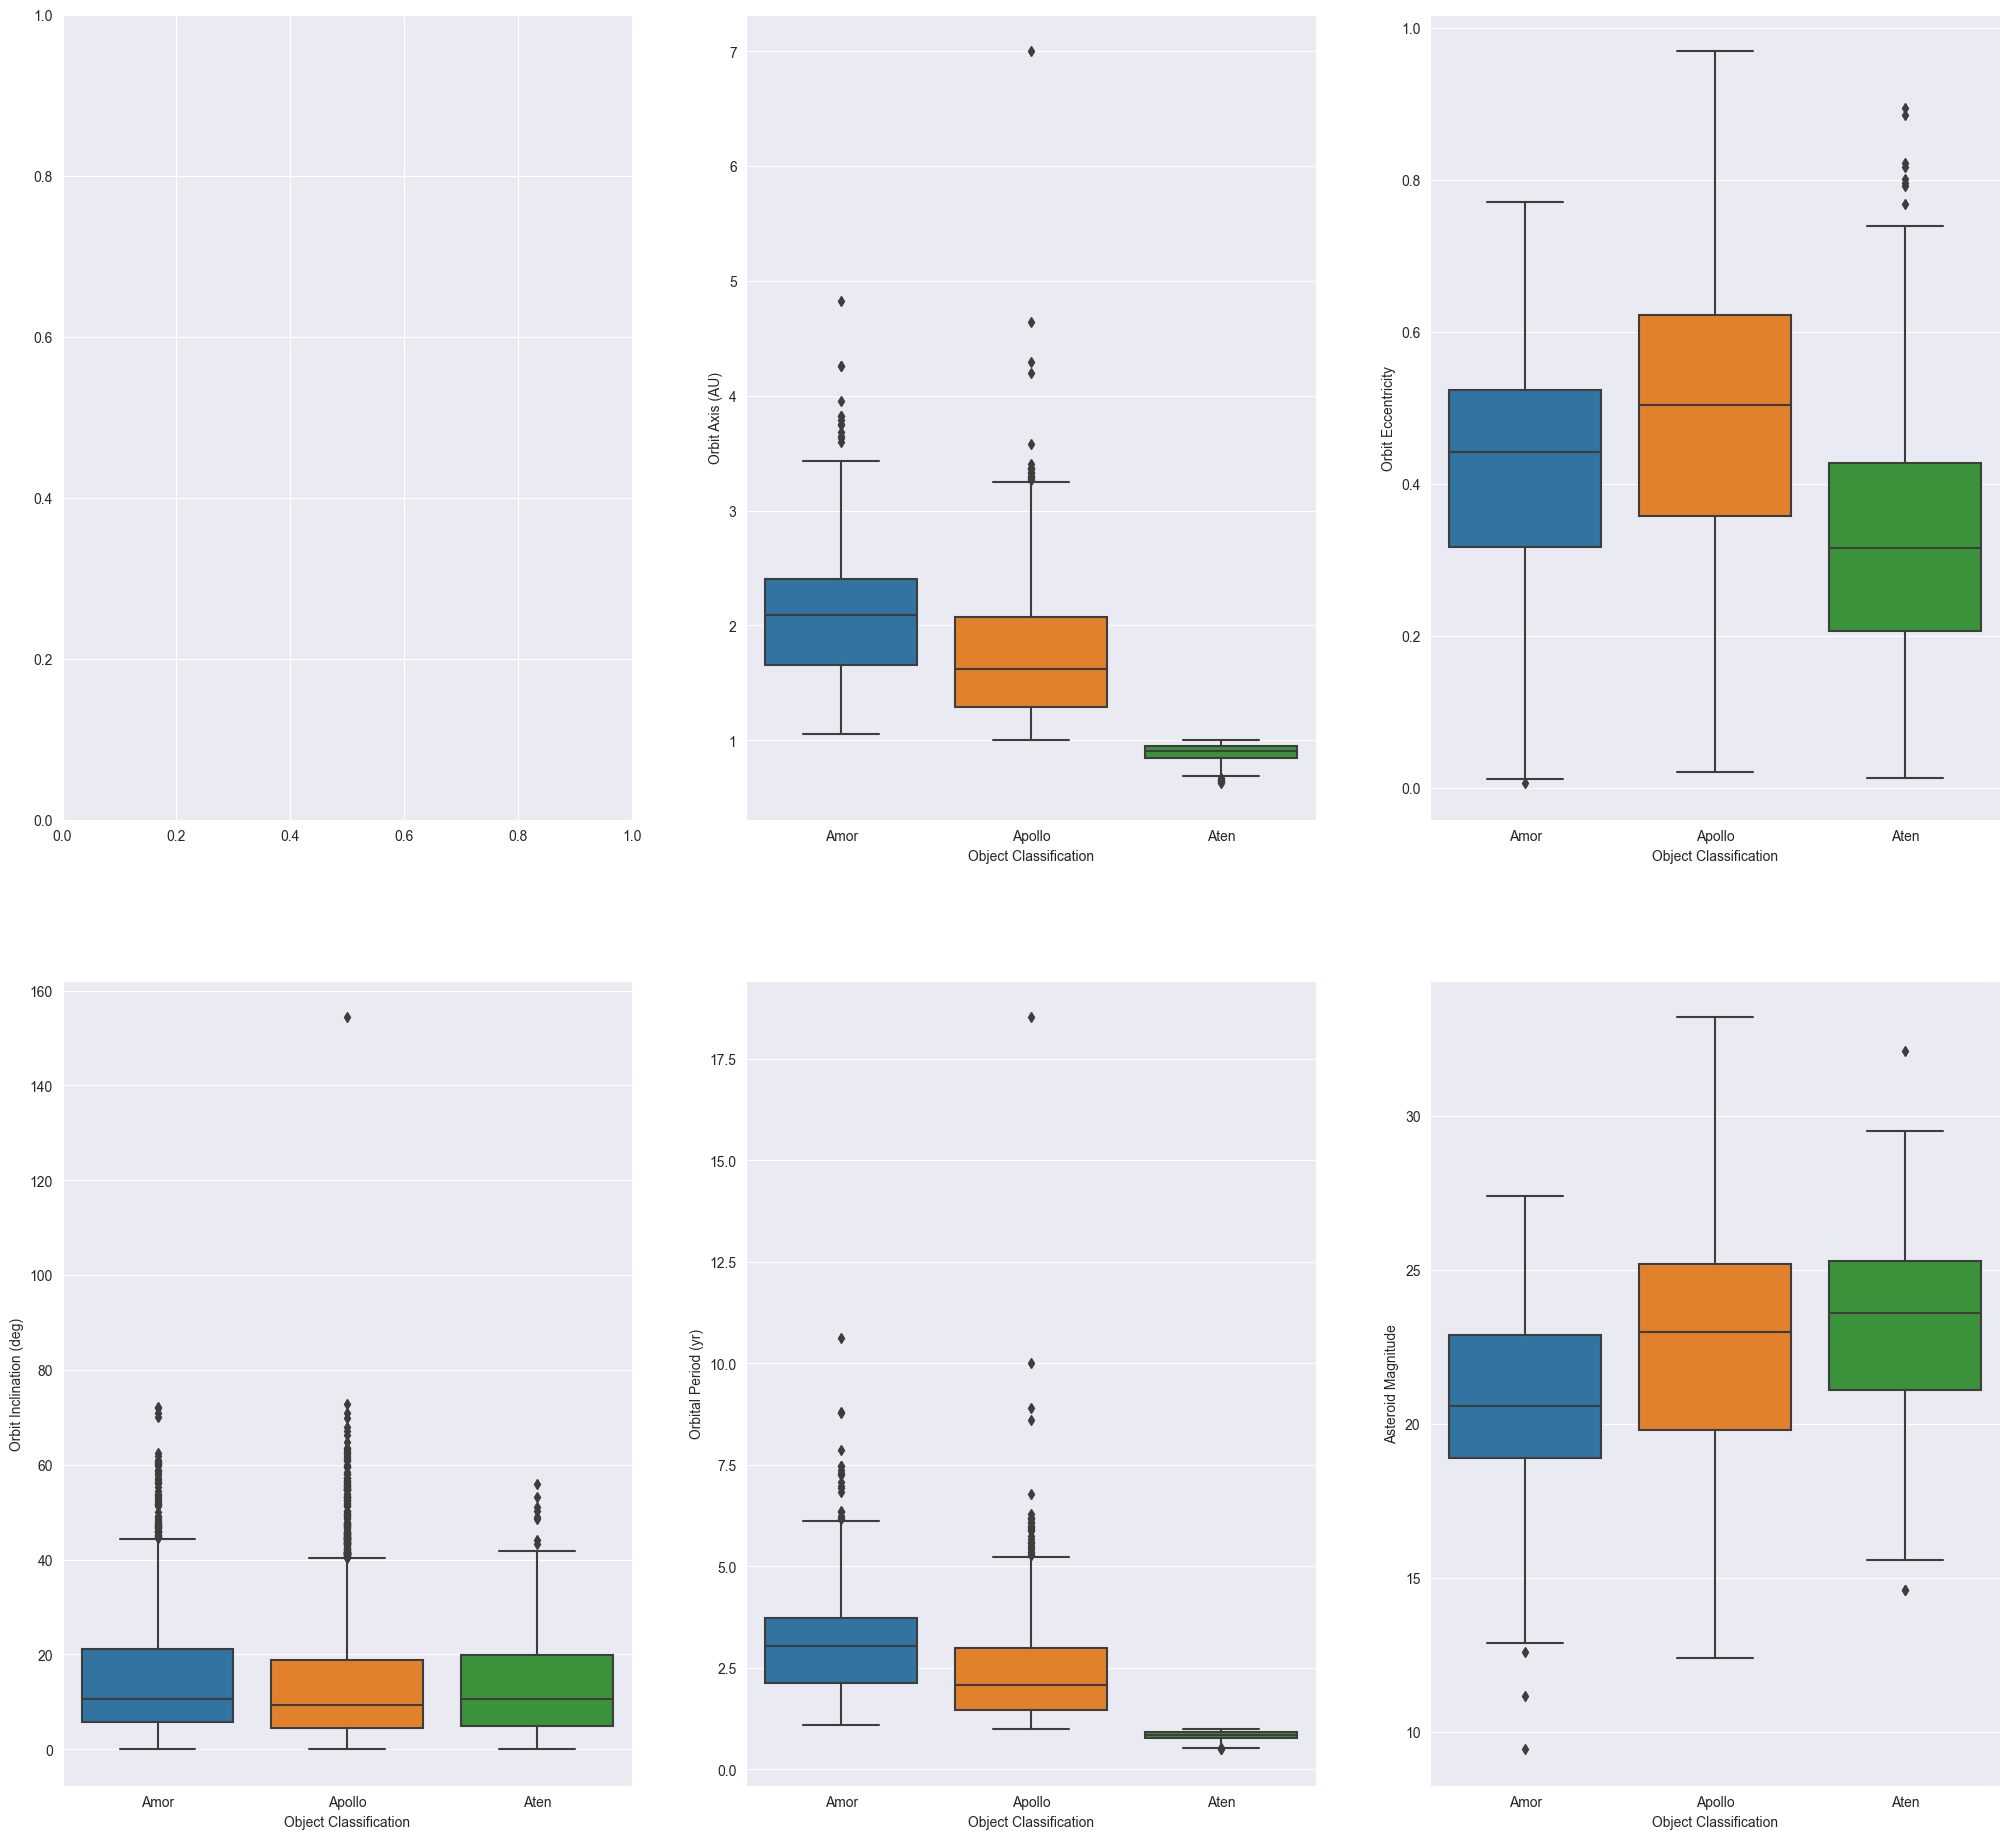

In [18]:
# Show boxplot to check for outliers
boxplot_data(asteroid_df, asteroid_features, 0)

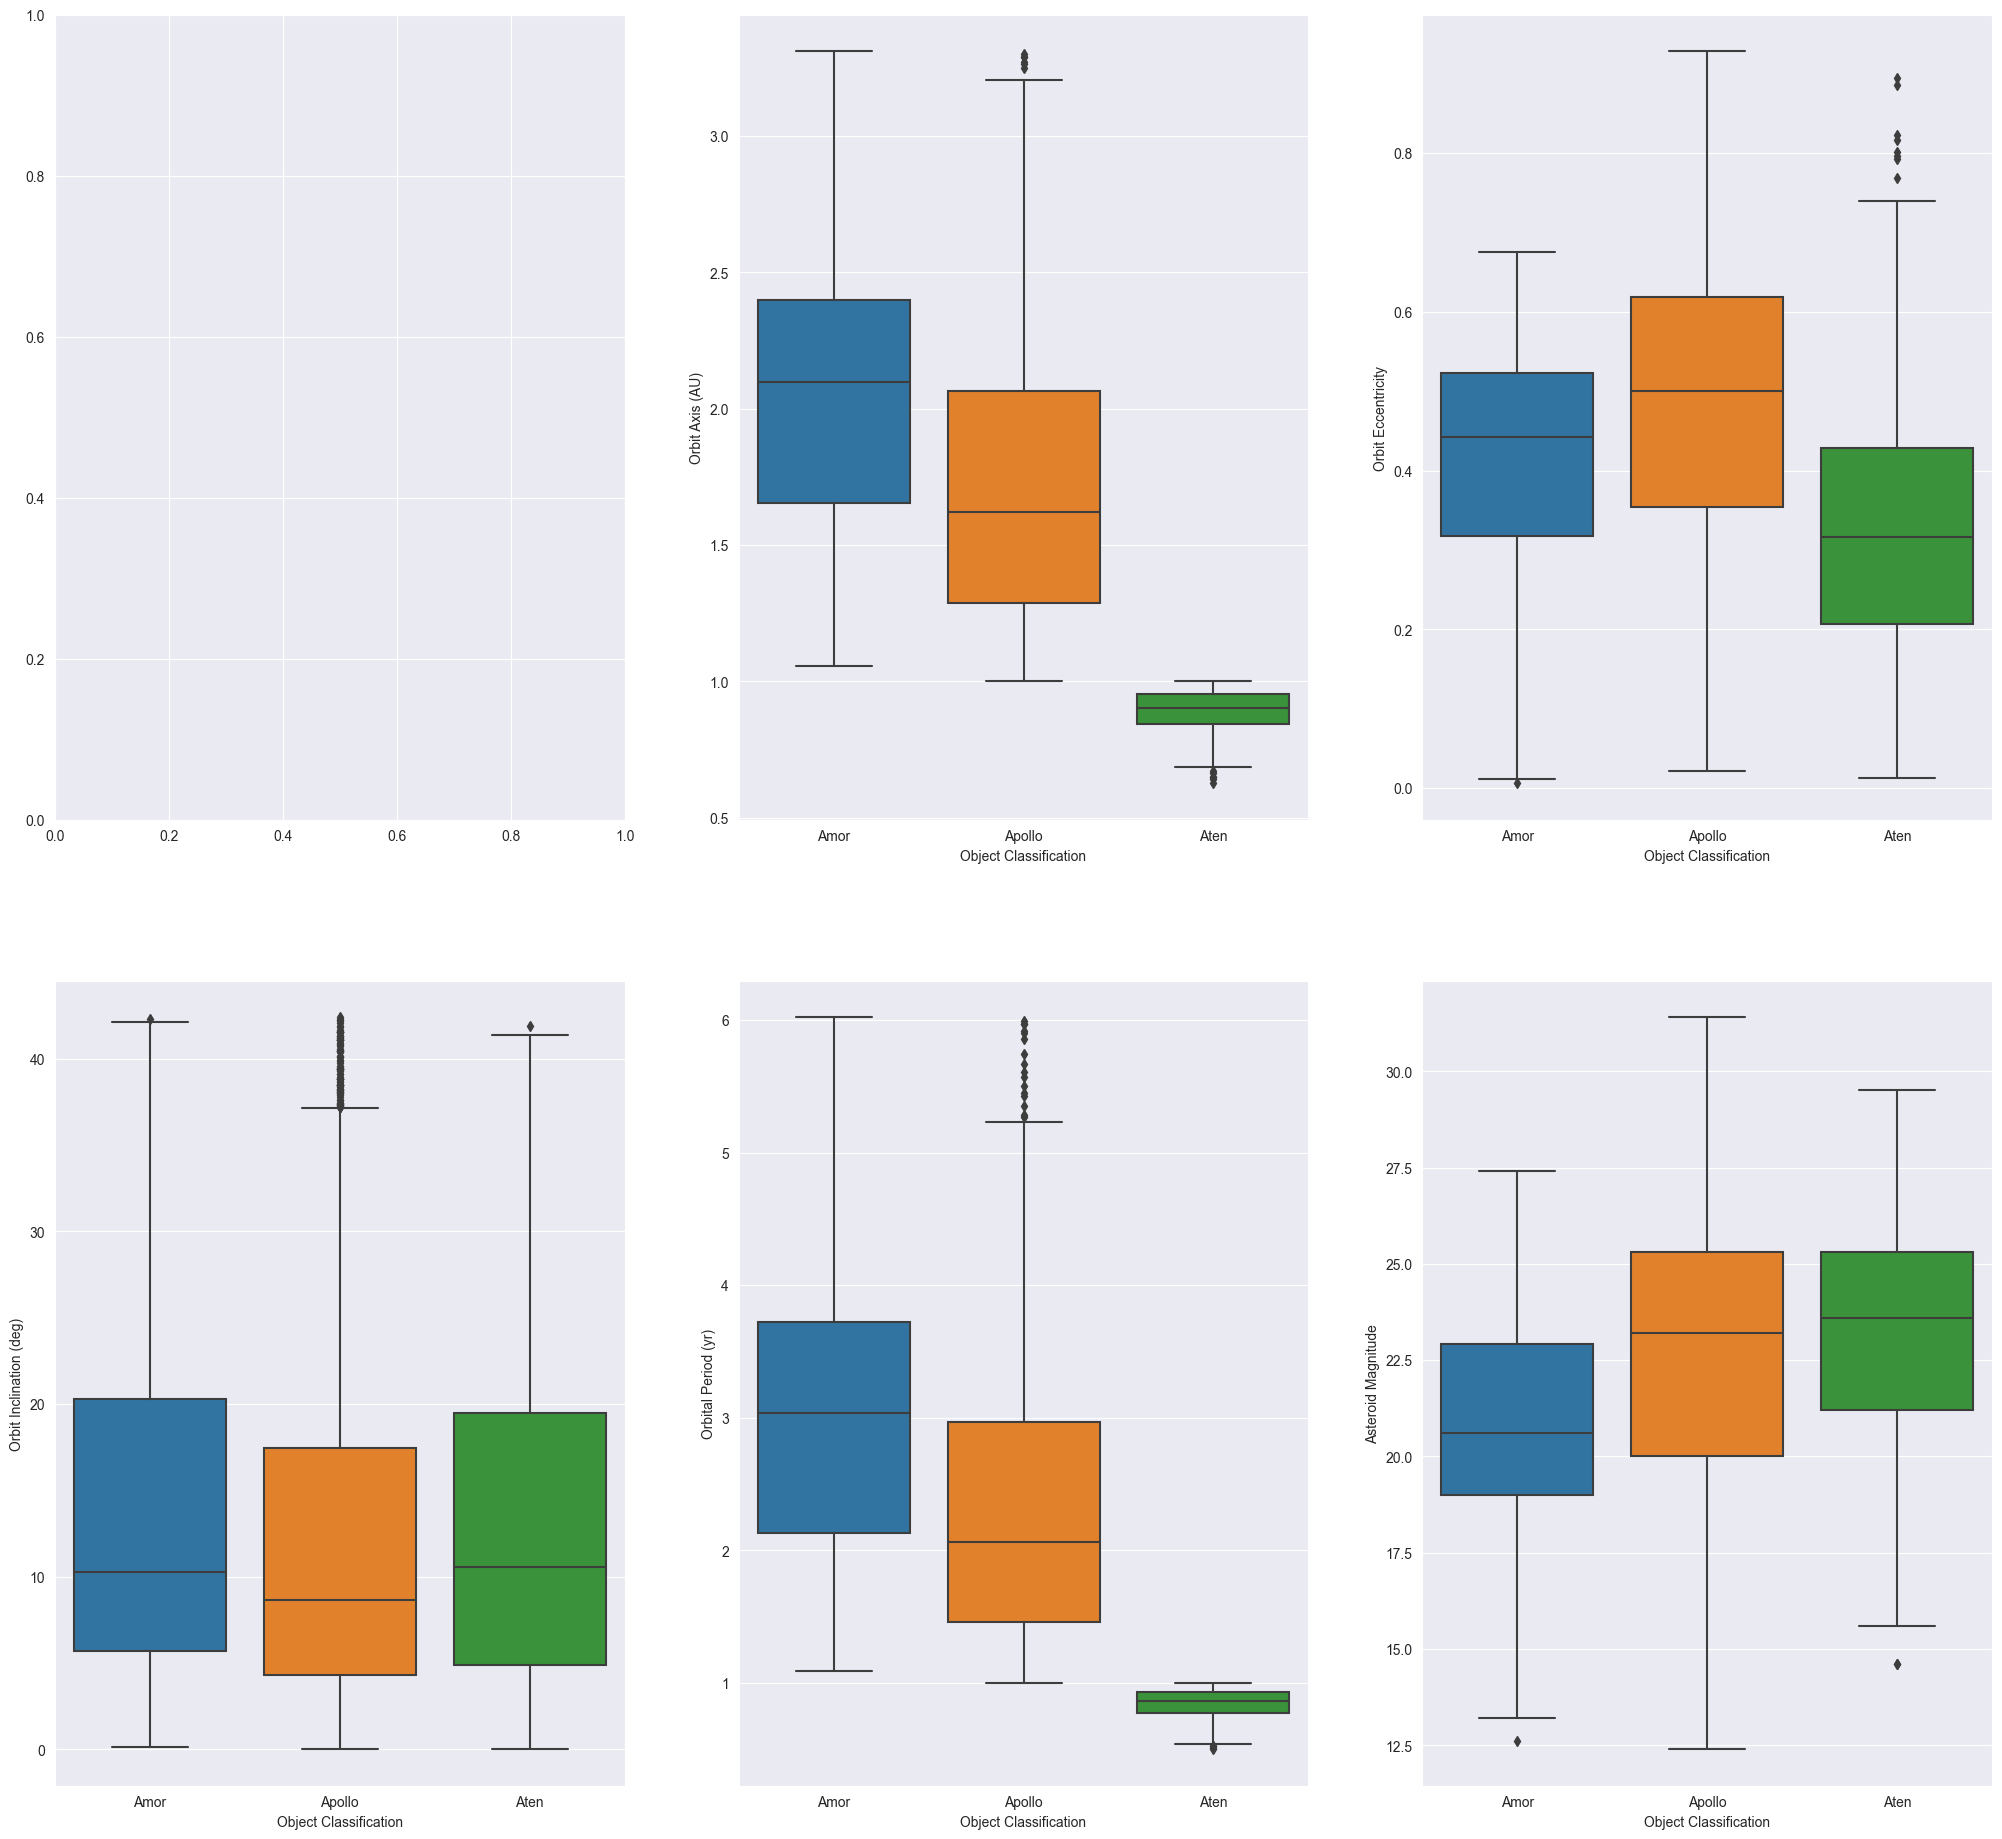

In [19]:
# Remove outliers from the dataframe
asteroid_df = remove_outliers(asteroid_df, asteroid_features)

# Show the boxplot
boxplot_data(asteroid_df, asteroid_features, 0)

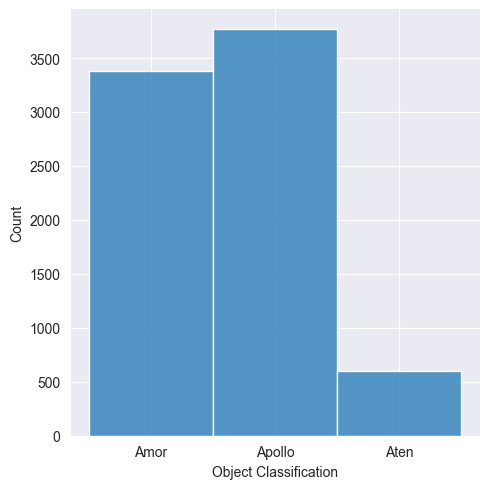

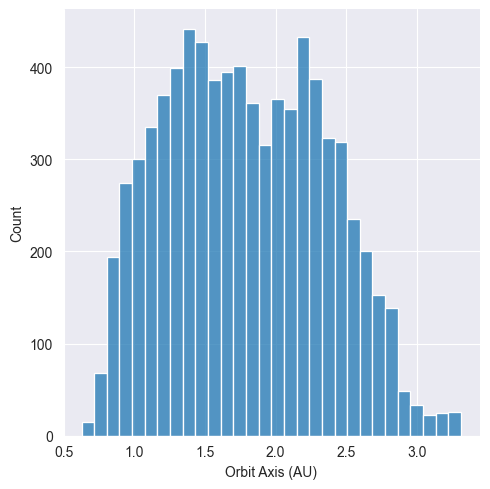

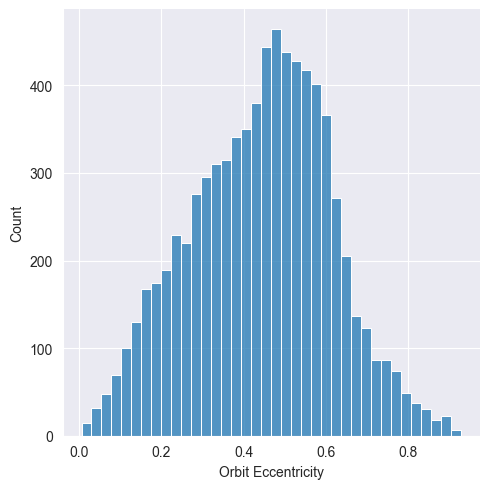

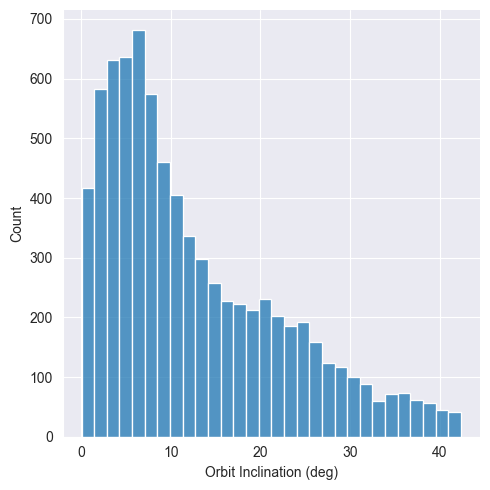

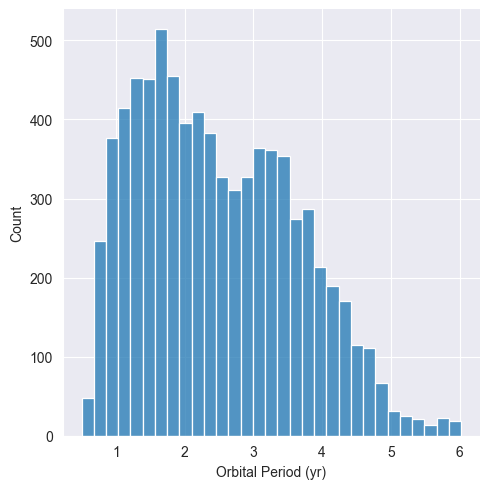

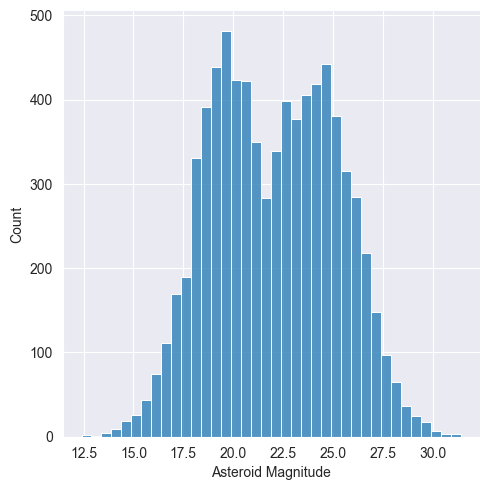

In [20]:
# Show histogram plot for our dataframe
histogram_data(asteroid_df, asteroid_features)

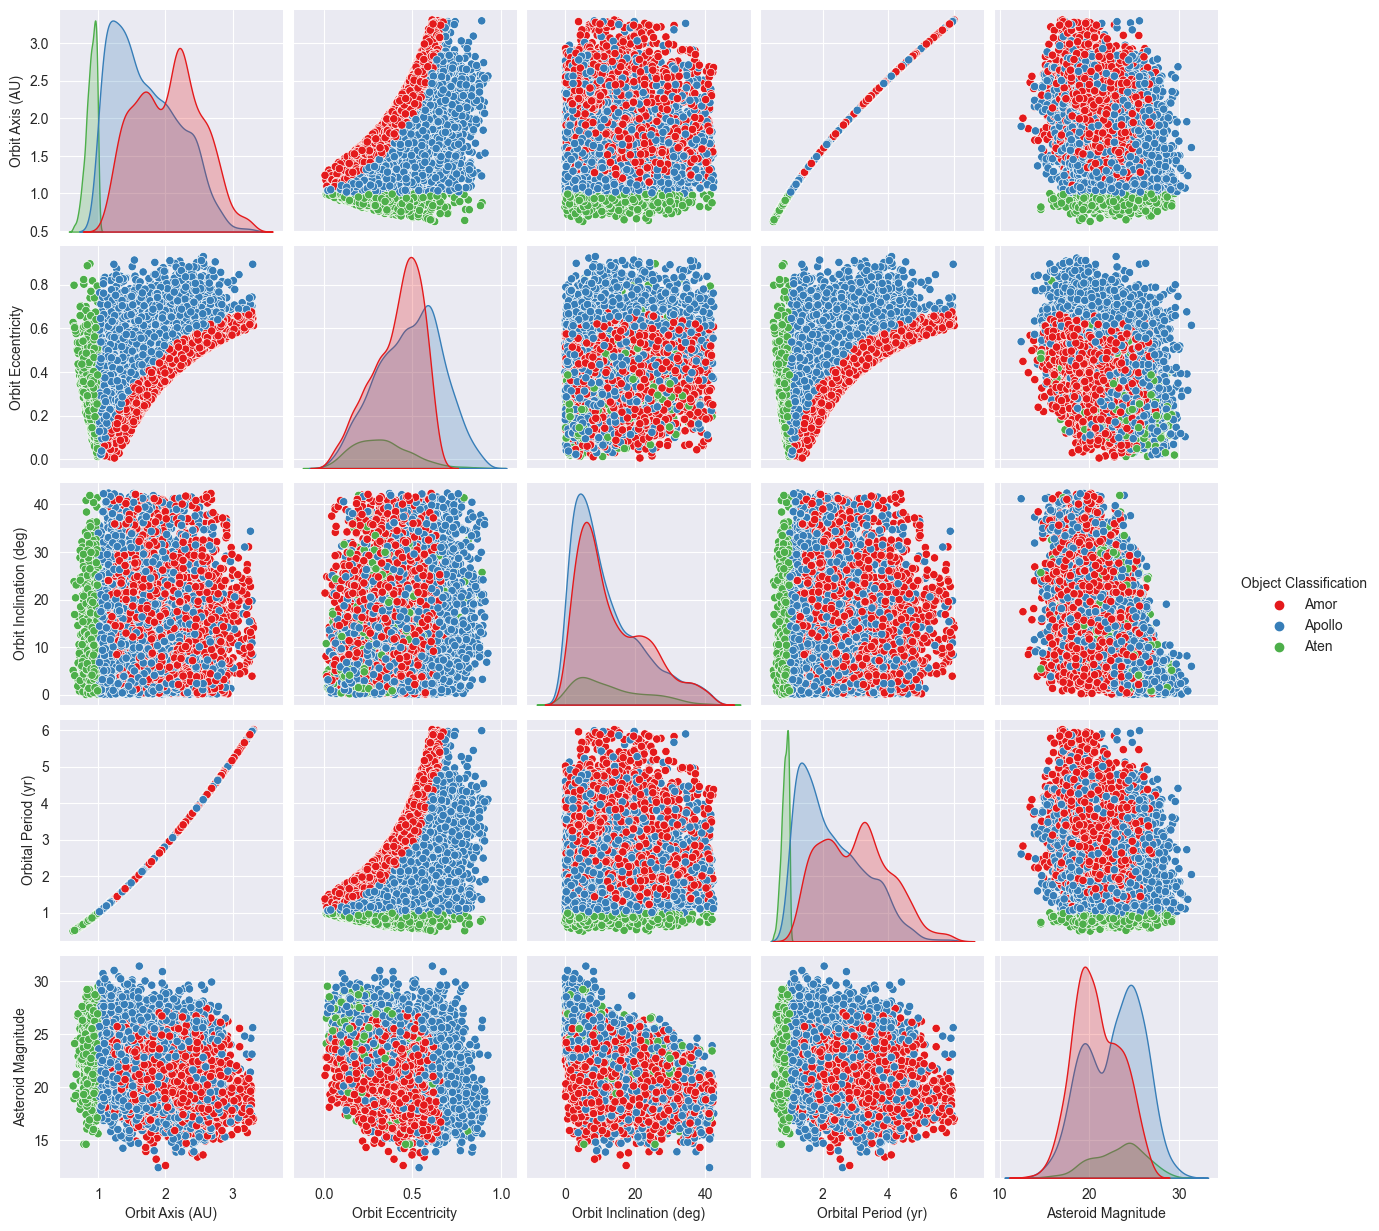

In [21]:
# Show pair plot for our features
sns.pairplot(asteroid_df, hue=asteroid_features[0], palette="Set1")

## Preprocess Dataset for model

In [22]:
# View class names
class_names = list(set(asteroid_df["Object Classification"]))
print(class_names)

['Amor', 'Apollo', 'Aten']


### Normalizing Dataset

In [23]:
# Create normalized dataset
norm_asteroid_df = asteroid_df.copy()
# apply normalization techniques
for column in norm_asteroid_df:
    if norm_asteroid_df[column].dtype == object:
        continue
    norm_asteroid_df[column] = norm_asteroid_df[column] / norm_asteroid_df[column].abs().max()

In [24]:
# View normalized Dataset
print(norm_asteroid_df.head())

  Object Classification  Orbit Axis (AU)  Orbit Eccentricity  \
1                  Amor         0.796889            0.590282   
2                  Amor         0.748626            0.610967   
4                  Amor         0.579613            0.469295   
8                  Amor         0.562609            0.427279   
9                Apollo         0.412957            0.469619   

   Orbit Inclination (deg)  Orbital Period (yr)  Asteroid Magnitude  
1                 0.273170             0.712625            0.493631  
2                 0.220667             0.647841            0.426752  
4                 0.280182             0.441860            0.563694  
8                 0.199325             0.421927            0.420382  
9                 0.221247             0.265781            0.453185  


In [25]:
# View info about Dataset
norm_asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7746 entries, 1 to 9380
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object Classification    7746 non-null   object 
 1   Orbit Axis (AU)          7746 non-null   float64
 2   Orbit Eccentricity       7746 non-null   float64
 3   Orbit Inclination (deg)  7746 non-null   float64
 4   Orbital Period (yr)      7746 non-null   float64
 5   Asteroid Magnitude       7746 non-null   float64
dtypes: float64(5), object(1)
memory usage: 681.6+ KB


### Numerizing Dataset

In [26]:
# Edit name of column "Object Classification" with _
# For using this name in next cell
number_asteroid_df = norm_asteroid_df.copy()
number_asteroid_df.rename(columns={"Object Classification": "Object_Classification"}, inplace=True)

In [27]:
# Replace string class to numbers
obj_class = {"Apollo": 0, "Aten": 1, "Amor": 2}
number_asteroid_df.Object_Classification = [obj_class[item] for item in number_asteroid_df.Object_Classification]

In [28]:
# View new dataset
print(number_asteroid_df.head())

   Object_Classification  Orbit Axis (AU)  Orbit Eccentricity  \
1                      2         0.796889            0.590282   
2                      2         0.748626            0.610967   
4                      2         0.579613            0.469295   
8                      2         0.562609            0.427279   
9                      0         0.412957            0.469619   

   Orbit Inclination (deg)  Orbital Period (yr)  Asteroid Magnitude  
1                 0.273170             0.712625            0.493631  
2                 0.220667             0.647841            0.426752  
4                 0.280182             0.441860            0.563694  
8                 0.199325             0.421927            0.420382  
9                 0.221247             0.265781            0.453185  


### One-Hot Encoding Dataset

In [29]:
# One-hot Encoding the Object Classification Feature
one_hot = OneHotEncoder()
# Copy our dataset
onehot_asteroid_df = norm_asteroid_df.copy()
# Fitting one-hot encoder
encoded = one_hot.fit_transform(onehot_asteroid_df[["Object Classification"]])
onehot_asteroid_df[one_hot.categories_[0]] = encoded.toarray()
# Drop unnecessary "Object Classification" feature
onehot_asteroid_df.drop(["Object Classification"], axis=1, inplace=True)
print(onehot_asteroid_df.head())

   Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
1         0.796889            0.590282                 0.273170   
2         0.748626            0.610967                 0.220667   
4         0.579613            0.469295                 0.280182   
8         0.562609            0.427279                 0.199325   
9         0.412957            0.469619                 0.221247   

   Orbital Period (yr)  Asteroid Magnitude  Amor  Apollo  Aten  
1             0.712625            0.493631   1.0     0.0   0.0  
2             0.647841            0.426752   1.0     0.0   0.0  
4             0.441860            0.563694   1.0     0.0   0.0  
8             0.421927            0.420382   1.0     0.0   0.0  
9             0.265781            0.453185   0.0     1.0   0.0  


In [30]:
# Change data type in one-hot encoded column
column_dtype_dict = {"Amor": int,
                     "Apollo": int,
                     "Aten": int}
norm_onehot_asteroid_df = onehot_asteroid_df.astype(column_dtype_dict)
print(norm_onehot_asteroid_df.dtypes)
print(norm_onehot_asteroid_df.head())

Orbit Axis (AU)            float64
Orbit Eccentricity         float64
Orbit Inclination (deg)    float64
Orbital Period (yr)        float64
Asteroid Magnitude         float64
Amor                         int32
Apollo                       int32
Aten                         int32
dtype: object
   Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
1         0.796889            0.590282                 0.273170   
2         0.748626            0.610967                 0.220667   
4         0.579613            0.469295                 0.280182   
8         0.562609            0.427279                 0.199325   
9         0.412957            0.469619                 0.221247   

   Orbital Period (yr)  Asteroid Magnitude  Amor  Apollo  Aten  
1             0.712625            0.493631     1       0     0  
2             0.647841            0.426752     1       0     0  
4             0.441860            0.563694     1       0     0  
8             0.421927            0.420382 

### Split Dataset to Train & Test

In [31]:
# Split Categorical Dataset
x = norm_asteroid_df.drop(["Object Classification"], axis=1)
y = norm_asteroid_df["Object Classification"]
# Split to train test sets
catg_X_train, catg_X_test, catg_y_train, catg_y_test = train_test_split(x, y, test_size=0.20)

In [32]:
# View x_train & y_train
print(f"X-train:\n{catg_X_train.head()}")
print(f"Y-train:\n{catg_y_train.head()}")

X-train:
      Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
5506         0.719722            0.613661                 0.052484   
5236         0.262398            0.642642                 0.307235   
8178         0.655150            0.586619                 0.190119   
6169         0.406977            0.293256                 0.284510   
2366         0.678133            0.607412                 0.123094   

      Orbital Period (yr)  Asteroid Magnitude  
5506             0.611296            0.872611  
5236             0.134551            0.824841  
8178             0.531561            0.735669  
6169             0.259136            0.773885  
2366             0.558140            0.754777  
Y-train:
5506      Amor
5236      Aten
8178    Apollo
6169    Apollo
2366    Apollo
Name: Object Classification, dtype: object


In [33]:
# Split Numeric Dataset
x = number_asteroid_df.drop(["Object_Classification"], axis=1)
y = number_asteroid_df["Object_Classification"]
# Split to train test sets
num_X_train, num_X_test, num_y_train, num_y_test = train_test_split(x, y, test_size=0.20)

In [34]:
# View x_train & y_train
print(f"X-train:\n{num_X_train.head()}")
print(f"Y-train:\n{num_y_train.head()}")

X-train:
      Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
6163         0.750891            0.626589                 0.141253   
4341         0.338840            0.245314                 0.192475   
8344         0.378194            0.442254                 0.511670   
3774         0.641860            0.554083                 0.197119   
6724         0.585322            0.584465                 0.029373   

      Orbital Period (yr)  Asteroid Magnitude  
6163             0.651163            0.738854  
4341             0.197674            0.761146  
8344             0.232558            0.707006  
3774             0.514950            0.710191  
6724             0.448505            0.891720  
Y-train:
6163    2
4341    0
8344    0
3774    2
6724    0
Name: Object_Classification, dtype: int64


In [35]:
# Split One-Hot Dataset
x = norm_onehot_asteroid_df.drop(["Apollo", "Aten", "Amor"], axis=1)
y = norm_onehot_asteroid_df[["Apollo", "Aten", "Amor"]]
# Split to train test sets
oneh_X_train, oneh_X_test, oneh_y_train, oneh_y_test = train_test_split(x, y, test_size=0.20)

In [36]:
# View x_train & y_train
print(f"X-train:\n{oneh_X_train.head()}")
print(f"Y-train:\n{oneh_y_train.head()}")

X-train:
      Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
3355         0.659378            0.520577                 0.522361   
7633         0.287466            0.120664                 0.142281   
5271         0.699577            0.480392                 0.088273   
977          0.555240            0.328916                 0.886517   
1593         0.399336            0.207283                 0.361207   

      Orbital Period (yr)  Asteroid Magnitude  
3355             0.536545            0.662420  
7633             0.154485            0.777070  
5271             0.586379            0.601911  
977              0.413621            0.589172  
1593             0.252492            0.636943  
Y-train:
      Apollo  Aten  Amor
3355       0     0     1
7633       0     1     0
5271       0     0     1
977        0     0     1
1593       0     0     1


In [37]:
# View splitting result
print(type(catg_X_train), type(catg_y_train))
print(catg_X_train.shape, catg_y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(6196, 5) (6196,)


## Creating Help functions for evaluating model

In [38]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used;
    :param y_true: Array of truth labels (must be same shape as y_pred);
    :param y_pred: Array of predicted labels (must be same shape as y_true);
    :param classes: Array of class labels (e.g. string form). If `None`, integer labels are used;
    :param figsize: Size of output figure (default=(10, 10));
    :param text_size: Size of output figure text (default=15);
    :param norm: normalize values or not (default=False);
    :param savefig: save confusion matrix to file (default=False).

    :returns: A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """
    # Create the confusion matrix
    type_true = type_of_target(y_true)
    if type_true == "multilabel-indicator":
        confusion_mx = multilabel_confusion_matrix(y_true, y_pred)
        print(confusion_mx)
        return
    else:
        confusion_mx = confusion_matrix(y_true, y_pred)
    confusion_mx_norm = confusion_mx.astype("float") / confusion_mx.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = confusion_mx.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(confusion_mx, cmap=plt.cm.Greens) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(confusion_mx.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will label with class names (if they exist) or ints
         yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (confusion_mx.max() + confusion_mx.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(confusion_mx.shape[0]), range(confusion_mx.shape[1])):
        if norm:
            plt.text(j, i, f"{confusion_mx[i, j]} ({confusion_mx_norm[i, j]*100:.1f}%)",
                     horizontalalignment="center",
                     color="white" if confusion_mx[i, j] > threshold else "black",
                     size=text_size)
        else:
            plt.text(j, i, f"{confusion_mx[i, j]}",
                     horizontalalignment="center",
                     color="white" if confusion_mx[i, j] > threshold else "black",
                     size=text_size)

    # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")


def classification_confusion_evaluation(y_true, y_pred, classes=None):
    """
    Help function for viewing classification report of predictions and visualise confusion matrix;
    :param y_true: Array of truth labels (must be same shape as y_pred);
    :param y_pred: Array of predicted labels (must be same shape as y_true);
    :param classes: Array of class labels (as string).
    """
    model_accuracy = accuracy_score(y_true, y_pred)

    print("==>Classification Report<==")
    print(classification_report(y_true, y_pred))
    print("==>Confusion Matrix<==")
    make_confusion_matrix(y_true, y_pred, classes)
    print("==========================")
    print("==>Model accuracy: {:.2f}".format(model_accuracy))

## Training Classification Algorithms

### Decision Tree

In [39]:
# Define Decision Tree with "gini" criteria and max depth of tree as 7
categorical_tree = DecisionTreeClassifier(criterion="gini", max_depth=7)
# Train the model on categorical data
categorical_tree.fit(catg_X_train, catg_y_train)

DecisionTreeClassifier(max_depth=7)

In [40]:
# Define Decision Tree with "gini" criteria and max depth of tree as 7
numeric_tree = DecisionTreeClassifier(criterion="gini", max_depth=7)
# Train the model on categorical data
numeric_tree.fit(num_X_train, num_y_train)

DecisionTreeClassifier(max_depth=7)

In [41]:
# Define Decision Tree with "gini" criteria and max depth of tree as 7
one_hot_tree = DecisionTreeClassifier(criterion="gini", max_depth=7)
# Train the model on categorical data
one_hot_tree.fit(oneh_X_train, oneh_y_train)

DecisionTreeClassifier(max_depth=7)

#### Taking predictions

In [42]:
# Take a prediction from the categorical data
catg_tree_pred = categorical_tree.predict(catg_X_test)

In [43]:
# Take a prediction from the numeric data
num_tree_pred = numeric_tree.predict(num_X_test)

In [44]:
# Take a prediction from the one-hot data
oneh_tree_pred = one_hot_tree.predict(oneh_X_test)

#### Tree Visualization

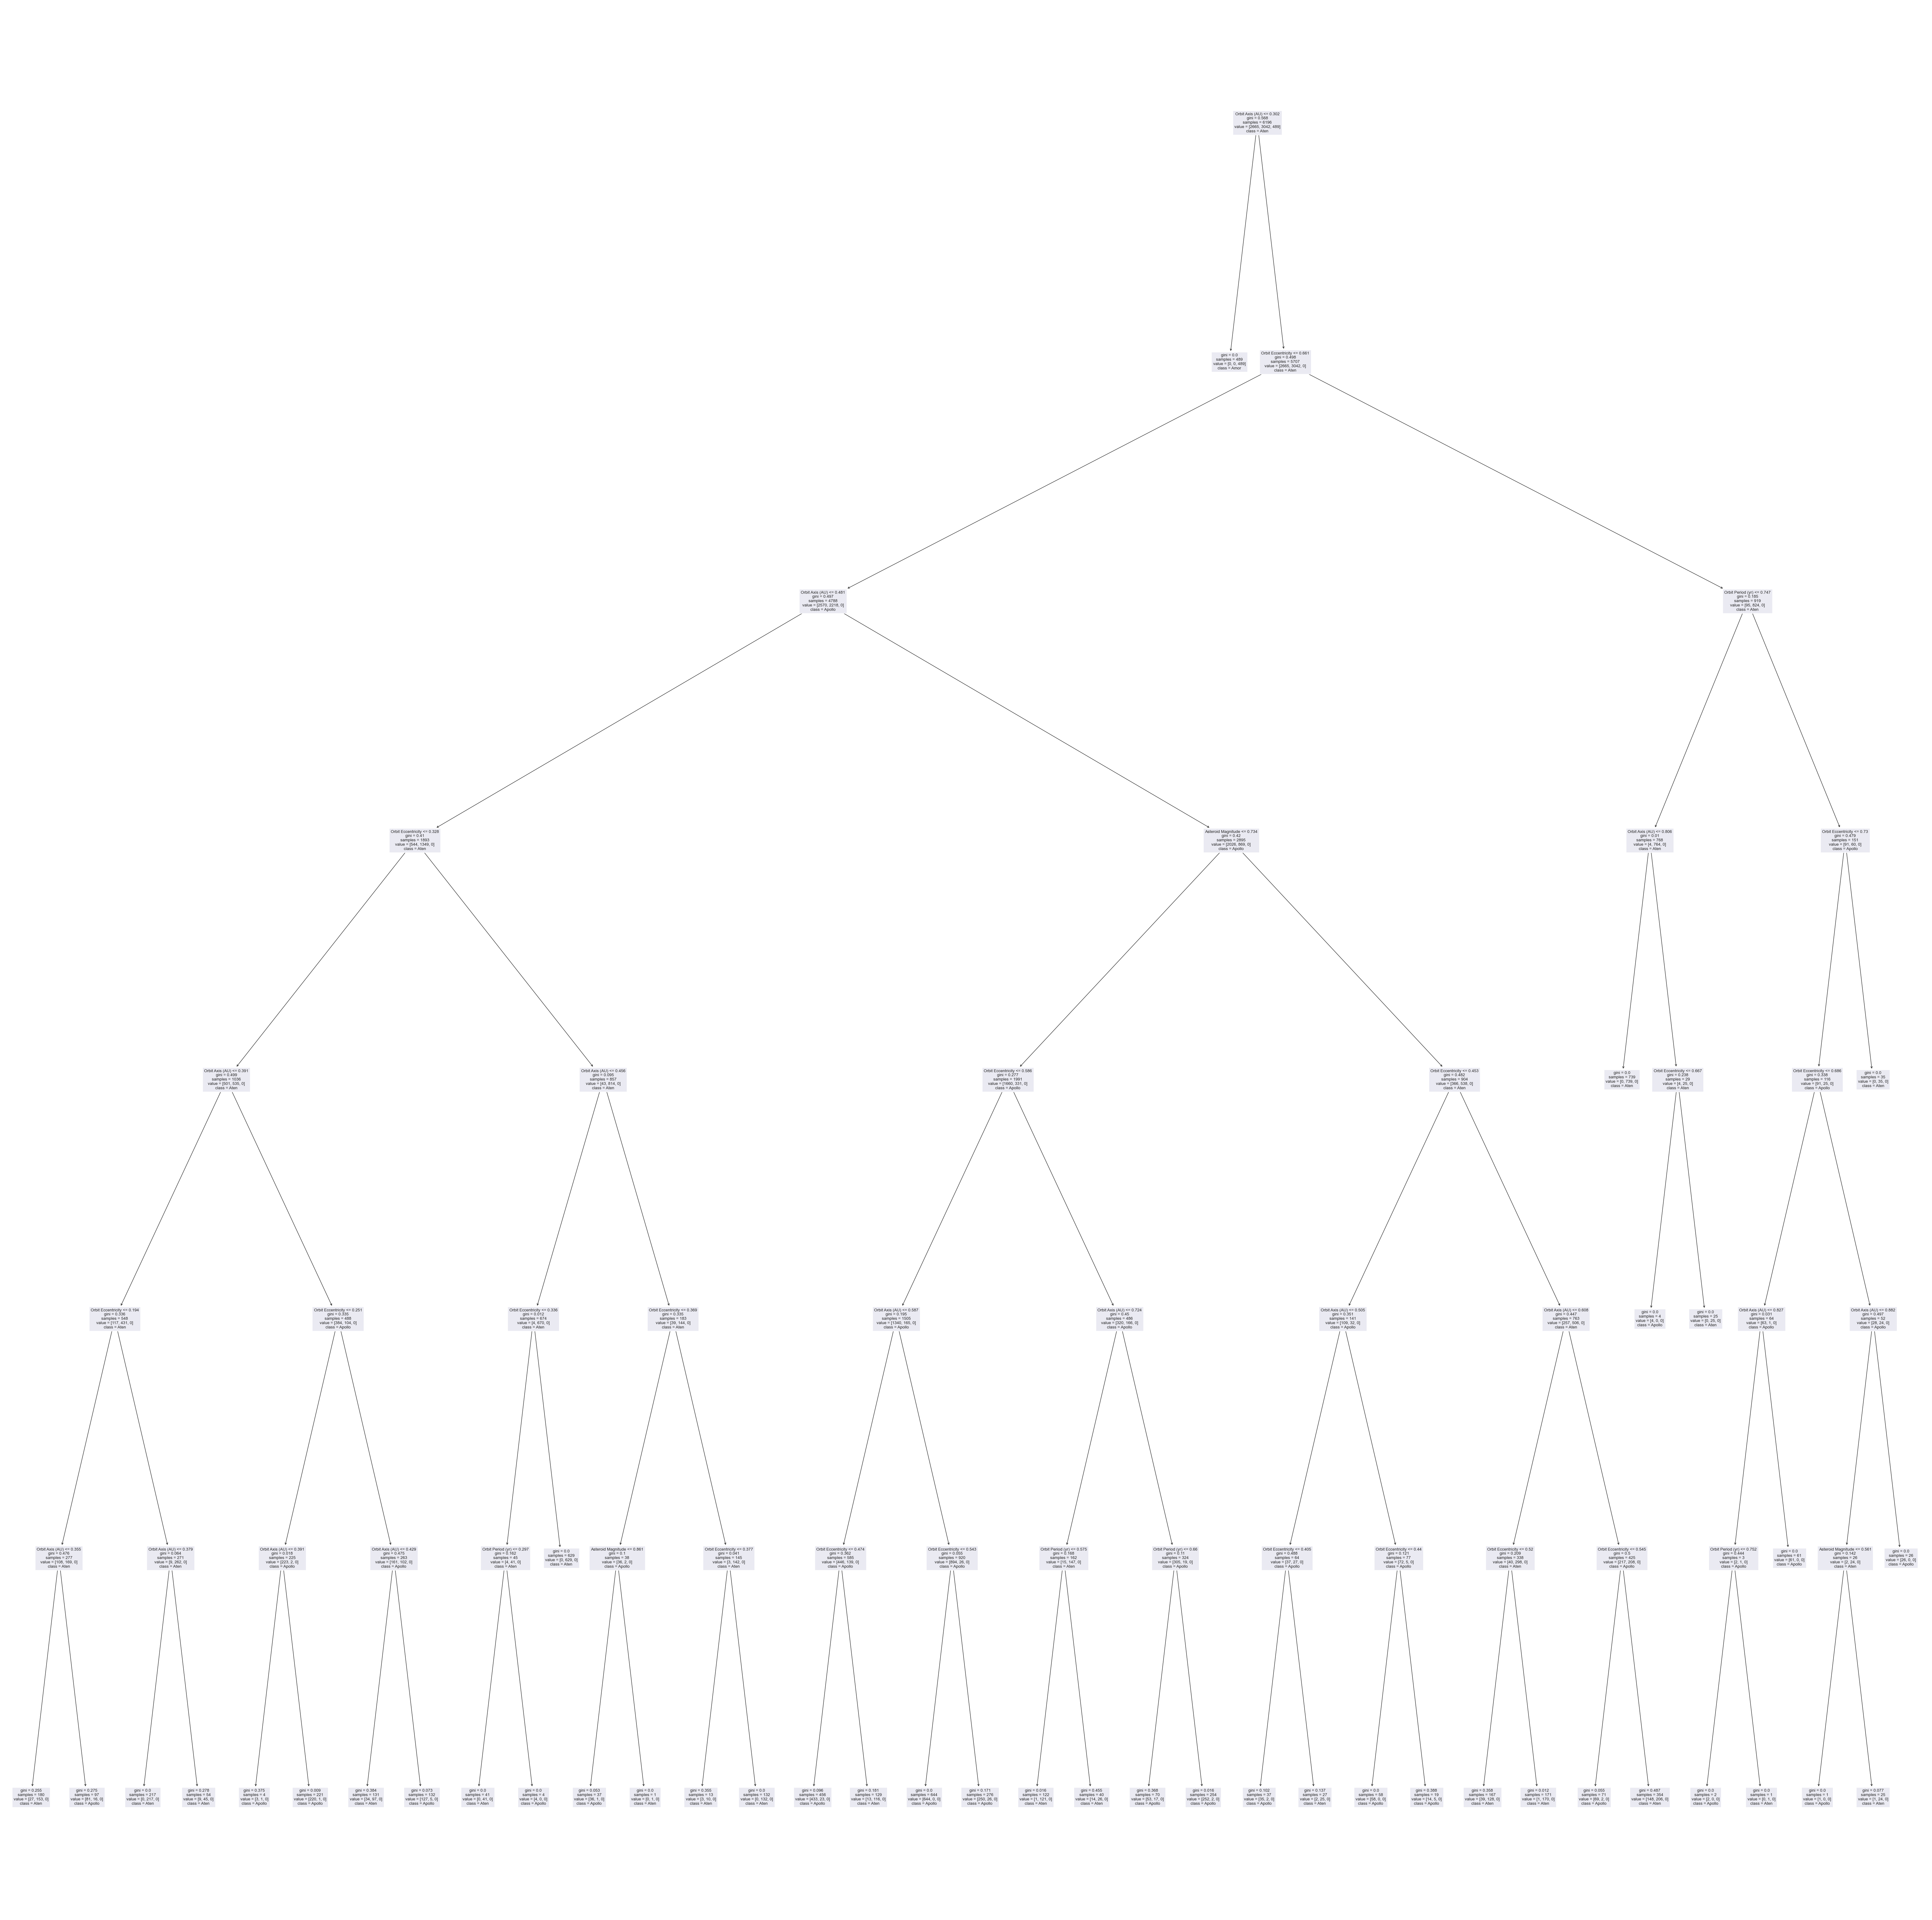

In [45]:
# Make visualization of our Decision Tree model
plt.figure(figsize=(80, 80))
plot_tree(categorical_tree, feature_names=["Orbit Axis (AU)", "Orbit Eccentricity", "Orbit Inclination (deg)",
                                "Orbit Period (yr)", "Asteroid Magnitude"],
          class_names=["Apollo", "Aten", "Amor"])
plt.show()

### Random Forest

In [46]:
# Define Random Forest model (with 100 random tree and random state 17)
categorical_forest = RandomForestClassifier(n_estimators=100,
                                            random_state=17)
# Train the model
categorical_forest.fit(catg_X_train, catg_y_train)

RandomForestClassifier(random_state=17)

In [47]:
# Define Random Forest model (with 100 random tree and random state 17)
numeric_forest = RandomForestClassifier(n_estimators=100,
                                        random_state=17)
# Train the model
numeric_forest.fit(num_X_train, num_y_train)

RandomForestClassifier(random_state=17)

In [48]:
# Define Random Forest model (with 100 random tree and random state 17)
one_hot_forest = RandomForestClassifier(n_estimators=100,
                                        random_state=17)
# Train the model
one_hot_forest.fit(oneh_X_train, oneh_y_train)

RandomForestClassifier(random_state=17)

#### Taking predictions

In [49]:
# Take a prediction from the model
catg_forest_pred = categorical_forest.predict(catg_X_test)

In [50]:
# Take a prediction from the model
num_forest_pred = numeric_forest.predict(num_X_test)

In [51]:
# Take a prediction from the model
oneh_forest_pred = one_hot_forest.predict(oneh_X_test)

### AdaBoost

In [52]:
# Define AdaBoost model
catg_adab = AdaBoostClassifier(n_estimators=100,
                              random_state=17)
# Train the model
catg_adab.fit(catg_X_train, catg_y_train)

AdaBoostClassifier(n_estimators=100, random_state=17)

In [53]:
# Define AdaBoost model
num_adab = AdaBoostClassifier(n_estimators=100,
                              random_state=17)
# Train the model
num_adab.fit(num_X_train, num_y_train)

AdaBoostClassifier(n_estimators=100, random_state=17)

In [54]:
# # Define AdaBoost model
# oneh_adab = AdaBoostClassifier(n_estimators=100,
#                               random_state=17)
# # Train the model
# oneh_adab.fit(oneh_X_train, oneh_y_train)

#### Tacking predictions

In [55]:
# Take a prediction from the model
catg_adab_pred = catg_adab.predict(catg_X_test)

In [56]:
# Take a prediction from the model
num_adab_pred = num_adab.predict(num_X_test)

In [57]:
# Take a prediction from the model
# oneh_adab_pred = oneh_adab.predict(oneh_X_test)

### kNN (K Nearest Neighbors)

#### Define Scaler

In [58]:
# Standardize the variables
# Define scaler
catg_scaler = StandardScaler()
# Fit the scaler
catg_scaler.fit(catg_X_train)
# Maker scaled data
scaled_catg_X_train = catg_scaler.transform(catg_X_train)
scaled_catg_X_test = catg_scaler.transform(catg_X_test)

In [59]:
# Standardize the variables
# Define scaler
num_scaler = StandardScaler()
# Fit the scaler
num_scaler.fit(num_X_train)
# Maker scaled data
scaled_num_X_train = num_scaler.transform(num_X_train)
scaled_num_X_test = num_scaler.transform(num_X_test)

In [60]:
# Standardize the variables
# Define scaler
oneh_scaler = StandardScaler()
# Fit the scaler
oneh_scaler.fit(oneh_X_train)
# Maker scaled data
scaled_oneh_X_train = oneh_scaler.transform(oneh_X_train)
scaled_oneh_X_test = oneh_scaler.transform(oneh_X_test)

#### Choosing optimal parameter

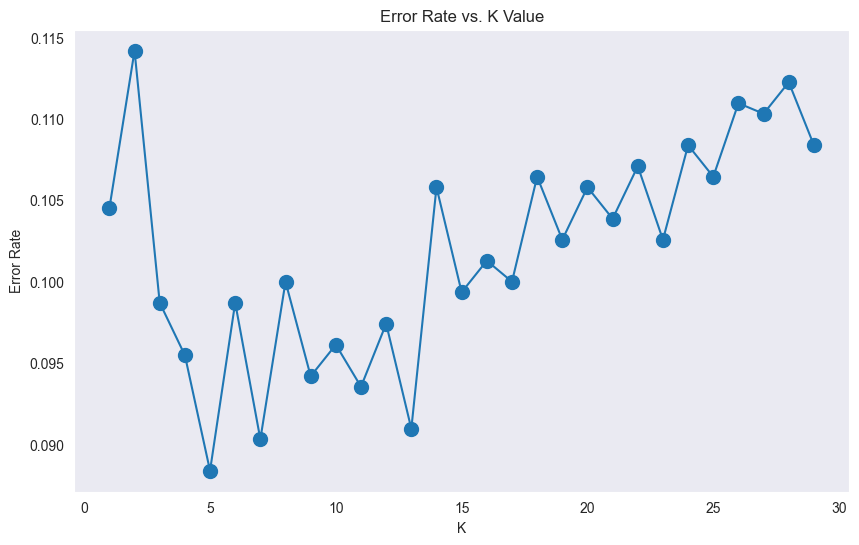

In [61]:
# Make array with error rate (Categorical)
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_catg_X_train, catg_y_train)
    pred_i = knn.predict(scaled_catg_X_test)
    error_rate.append(np.mean(pred_i != catg_y_test))
# Plotting results of error for all neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_rate, marker="o", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid()

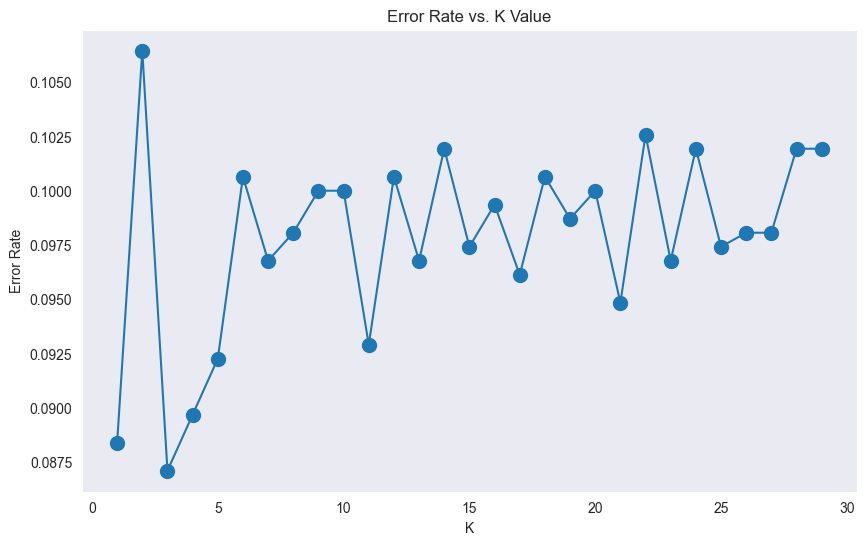

In [62]:
# Make array with error rate (Numerical)
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_num_X_train, num_y_train)
    pred_i = knn.predict(scaled_num_X_test)
    error_rate.append(np.mean(pred_i != num_y_test))
# Plotting results of error for all neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_rate, marker="o", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid()

D:\.main\.code\data_analysis_labs\venv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
D:\.main\.code\data_analysis_labs\venv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
D:\.main\.code\data_analysis_labs\venv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out,

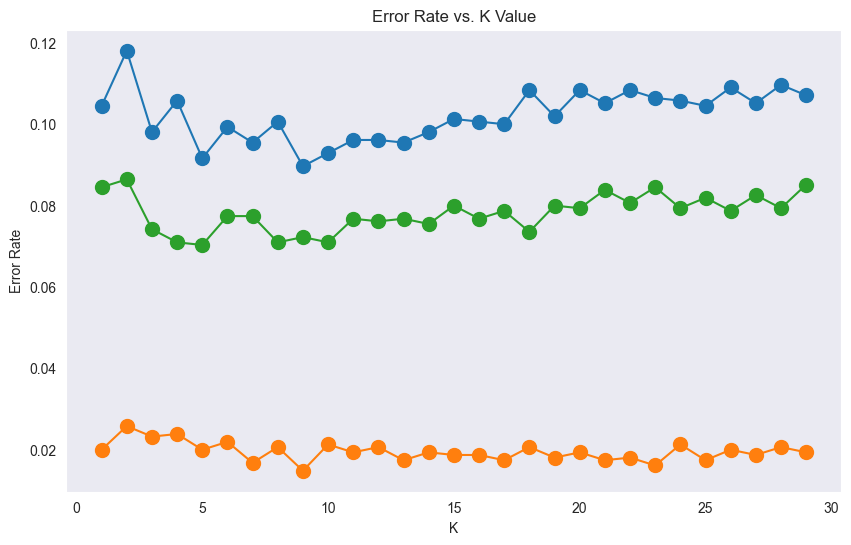

In [63]:
# Make array with error rate (One-Hot)
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_oneh_X_train, oneh_y_train)
    pred_i = knn.predict(scaled_oneh_X_test)
    error_rate.append(np.mean(pred_i != oneh_y_test))
# Plotting results of error for all neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_rate, marker="o", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid()

#### Define and train model

In [64]:
# Define kNN model
catg_knn = KNeighborsClassifier(n_neighbors=15)
# Train the model
catg_knn.fit(scaled_catg_X_train, catg_y_train)

KNeighborsClassifier(n_neighbors=15)

In [65]:
# Define kNN model
num_knn = KNeighborsClassifier(n_neighbors=7)
# Train the model
num_knn.fit(scaled_num_X_train, num_y_train)

KNeighborsClassifier(n_neighbors=7)

In [66]:
# Define kNN model with new optimal parameter n_neighbors for best result
oneh_knn = KNeighborsClassifier(n_neighbors=5)
# Train the model
oneh_knn.fit(scaled_oneh_X_train, oneh_y_train)

KNeighborsClassifier()

#### Taking predictions

In [67]:
# Take a prediction from the model
catg_knn_pred = catg_knn.predict(scaled_catg_X_test)

In [68]:
# Take a prediction from the model
num_knn_pred = num_knn.predict(scaled_num_X_test)

In [69]:
oneh_knn_pred = oneh_knn.predict(scaled_oneh_X_test)

### SVM (Support Vector Machine)

In [70]:
# Define SVM model
catg_svm = SVC(C=1.0, gamma=1.0, kernel='rbf')
# Train the model
catg_svm.fit(scaled_catg_X_train, catg_y_train)

SVC(gamma=1.0)

In [71]:
# Define SVM model
num_svm = SVC(C=1.0, gamma=1.0, kernel='rbf')
# Train the model
num_svm.fit(scaled_num_X_train, num_y_train)

SVC(gamma=1.0)

In [72]:
# # Define SVM model
# oneh_svm = SVC(C=1.0, gamma=1.0, kernel='rbf')
# # Train the model
# oneh_svm.fit(scaled_oneh_X_train, oneh_y_train)

#### Tacking predictions

In [73]:
# Take a prediction from the model
catg_svm_pred = catg_svm.predict(catg_X_test)

D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [74]:
# Take a prediction from the model
num_svm_pred = num_svm.predict(num_X_test)

D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [75]:
# Take a prediction from the model
# oneh_svm_pred = oneh_svm.predict(oneh_X_test)

### Choosing optimal parameter

In [76]:
# Make Gridsearch for find optimal parameters for SVM
param_grid = {"C": [0.1, 1, 10, 100, 1000],
              "gamma": [1, .1, .01, .001, .0001],
              "kernel": ["rbf"]}

#### Define Grid Search

In [77]:
# Define for Categorical data
catg_grid = GridSearchCV(SVC(), param_grid, refit=True)

In [78]:
# Define for Numeric data
num_grid = GridSearchCV(SVC(), param_grid, refit=True)

In [79]:
# Define for One-hot data
# one_hot_grid = GridSearchCV(SVC(), param_grid, refit=True)

#### Fitting Grid

In [80]:
# Fit the grid
catg_grid.fit(scaled_catg_X_train, catg_y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [81]:
# Fit the grid
num_grid.fit(scaled_num_X_train, num_y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [82]:
# Fit the grid
# one_hot_grid.fit(scaled_oneh_X_train, oneh_y_train)

#### View optimal parameters for all SVM

In [83]:
# View optimal parameters for SVM
print(catg_grid.best_params_)
# View best estimation parameters
print(catg_grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [84]:
# View optimal parameters for SVM
print(num_grid.best_params_)
# View best estimation parameters
print(num_grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [85]:
# # View optimal parameters for SVM
# print(one_hot_grid.best_params_)
# # View best estimation parameters
# print(one_hot_grid.best_estimator_)

#### Tacking predictions

In [86]:
# Take a grid predictions
catg_grid_pred = catg_grid.predict(scaled_catg_X_test)

In [87]:
# Take a grid predictions
num_grid_pred = num_grid.predict(scaled_num_X_test)

In [88]:
# Take a grid predictions
# oneh_grid_pred = one_hot_grid.predict(scaled_oneh_X_test)

## Choosing best model (Evaluating)
View model classification report (with precision, recall and f1-score), confusion matrix and accuracy score.

### Decision Tree

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       0.93      0.85      0.89       715
      Apollo       0.86      0.94      0.90       724
        Aten       1.00      1.00      1.00       111

    accuracy                           0.90      1550
   macro avg       0.93      0.93      0.93      1550
weighted avg       0.90      0.90      0.90      1550

==>Confusion Matrix<==
==>Model accuracy: 0.90


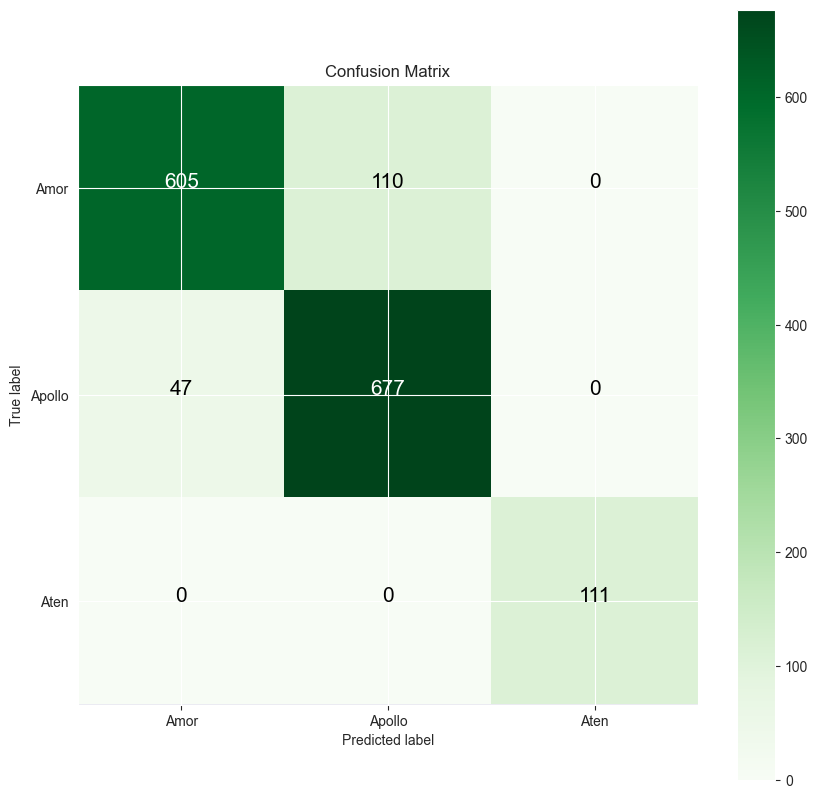

In [89]:
# Categorical Data
classification_confusion_evaluation(catg_y_test, catg_tree_pred, class_names)

==>Classification Report<==
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       733
           1       1.00      0.99      1.00       123
           2       0.89      0.84      0.86       694

    accuracy                           0.88      1550
   macro avg       0.91      0.91      0.91      1550
weighted avg       0.88      0.88      0.88      1550

==>Confusion Matrix<==
==>Model accuracy: 0.88


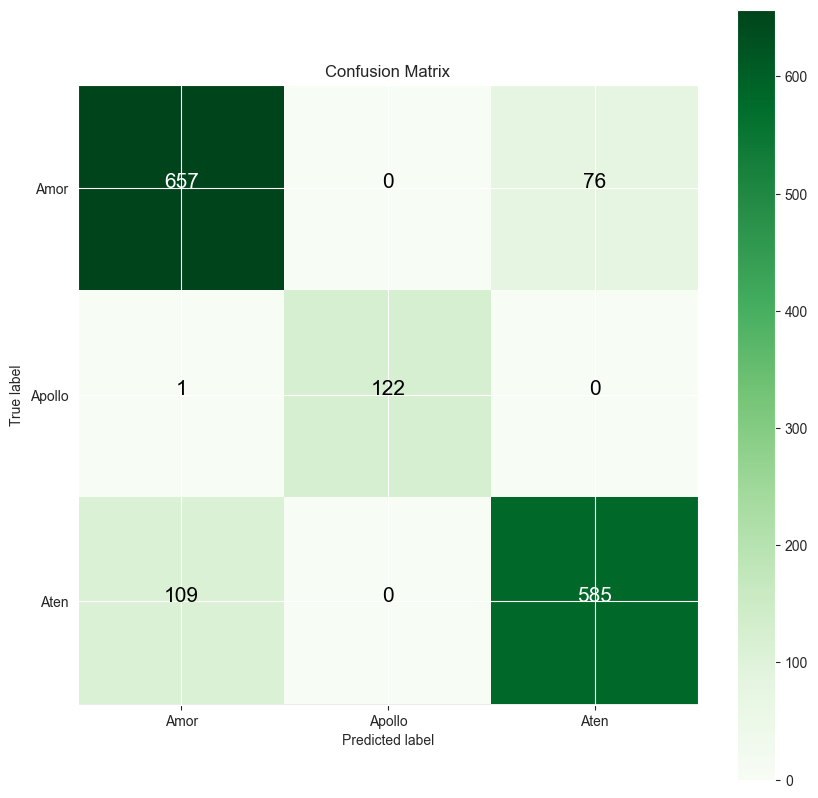

In [90]:
# Number Data
classification_confusion_evaluation(num_y_test, num_tree_pred, class_names)

In [91]:
# One-Hot Encoded Data
classification_confusion_evaluation(oneh_y_test, oneh_tree_pred, class_names)

==>Classification Report<==
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       747
           1       1.00      1.00      1.00       127
           2       0.90      0.90      0.90       676

   micro avg       0.91      0.91      0.91      1550
   macro avg       0.94      0.94      0.94      1550
weighted avg       0.91      0.91      0.91      1550
 samples avg       0.91      0.91      0.91      1550

==>Confusion Matrix<==
[[[ 733   70]
  [  64  683]]

 [[1423    0]
  [   0  127]]

 [[ 810   64]
  [  70  606]]]
==>Model accuracy: 0.91


### Random Forest

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       0.97      0.97      0.97       715
      Apollo       0.97      0.97      0.97       724
        Aten       1.00      1.00      1.00       111

    accuracy                           0.98      1550
   macro avg       0.98      0.98      0.98      1550
weighted avg       0.98      0.98      0.98      1550

==>Confusion Matrix<==
==>Model accuracy: 0.98


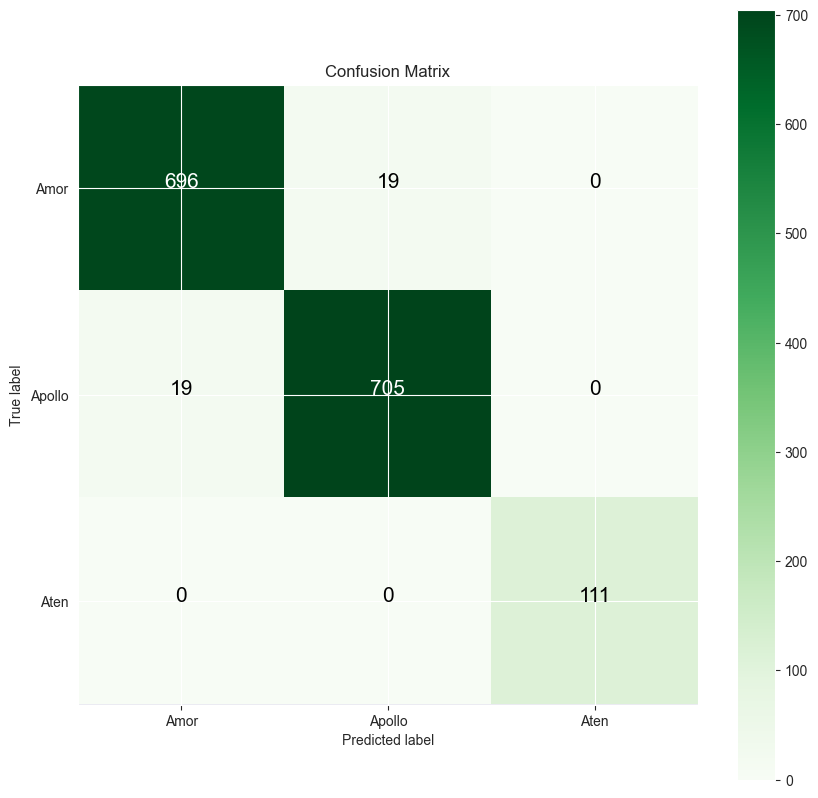

In [92]:
# Categorical Data
classification_confusion_evaluation(catg_y_test, catg_forest_pred, class_names)

==>Classification Report<==
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       733
           1       1.00      0.98      0.99       123
           2       0.99      0.98      0.98       694

    accuracy                           0.98      1550
   macro avg       0.99      0.98      0.99      1550
weighted avg       0.98      0.98      0.98      1550

==>Confusion Matrix<==
==>Model accuracy: 0.98


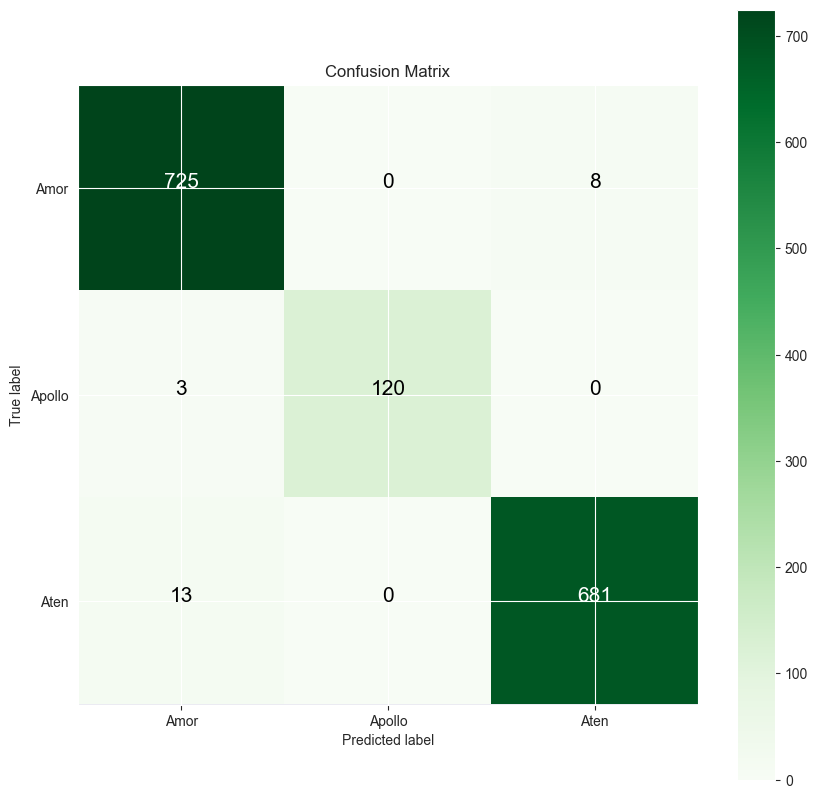

In [93]:
# Number Data
classification_confusion_evaluation(num_y_test, num_forest_pred, class_names)

In [94]:
# One-Hot Encoded Data
classification_confusion_evaluation(oneh_y_test, oneh_forest_pred, class_names)

==>Classification Report<==
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       747
           1       1.00      1.00      1.00       127
           2       0.98      0.97      0.97       676

   micro avg       0.98      0.98      0.98      1550
   macro avg       0.98      0.98      0.98      1550
weighted avg       0.98      0.98      0.98      1550
 samples avg       0.98      0.98      0.98      1550

==>Confusion Matrix<==
[[[ 781   22]
  [  13  734]]

 [[1423    0]
  [   0  127]]

 [[ 862   12]
  [  22  654]]]
==>Model accuracy: 0.98


D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### AdaBoost

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       1.00      0.00      0.01       715
      Apollo       0.50      1.00      0.67       724
        Aten       1.00      1.00      1.00       111

    accuracy                           0.54      1550
   macro avg       0.83      0.67      0.56      1550
weighted avg       0.77      0.54      0.39      1550

==>Confusion Matrix<==
==>Model accuracy: 0.54


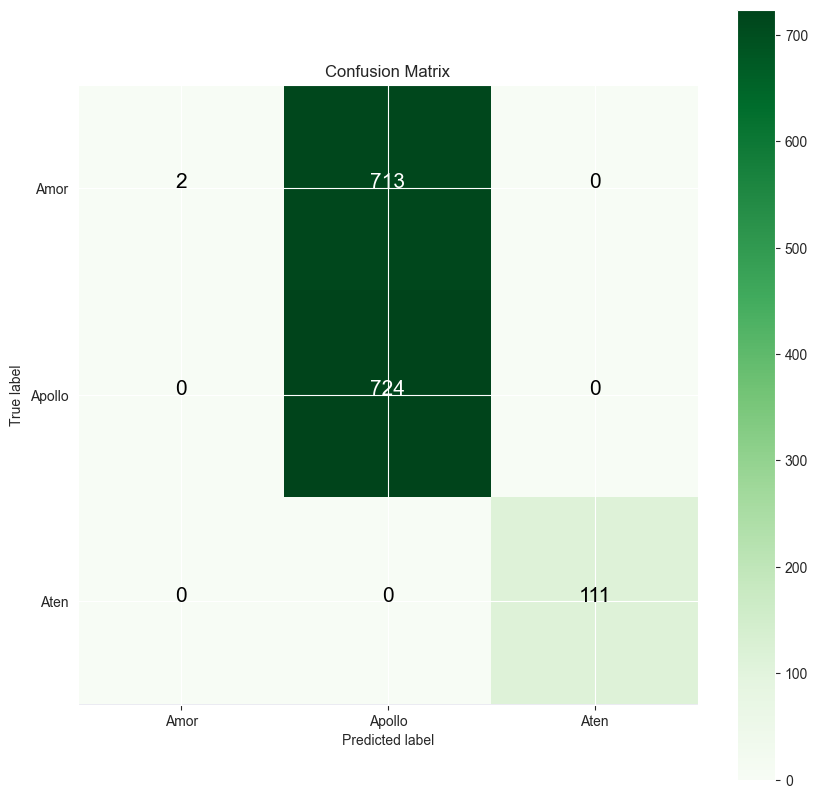

In [95]:
# Categorical Data
classification_confusion_evaluation(catg_y_test, catg_adab_pred, class_names)

==>Classification Report<==
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       733
           1       1.00      0.99      1.00       123
           2       1.00      0.02      0.03       694

    accuracy                           0.56      1550
   macro avg       0.84      0.67      0.57      1550
weighted avg       0.77      0.56      0.42      1550

==>Confusion Matrix<==
==>Model accuracy: 0.56


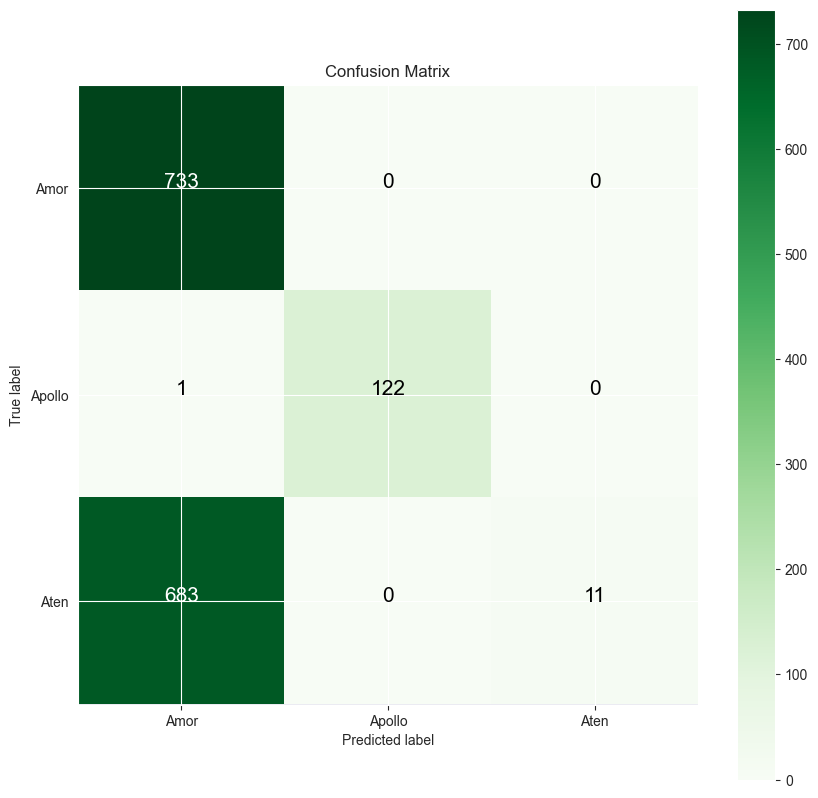

In [96]:
# Number Data
classification_confusion_evaluation(num_y_test, num_adab_pred, class_names)

In [97]:
# One-Hot Encoded Data
# classification_confusion_evaluation(oneh_y_test, catg_tree_pred, class_names)

### kNN

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       0.90      0.92      0.91       715
      Apollo       0.90      0.89      0.89       724
        Aten       0.91      0.83      0.87       111

    accuracy                           0.90      1550
   macro avg       0.90      0.88      0.89      1550
weighted avg       0.90      0.90      0.90      1550

==>Confusion Matrix<==
==>Model accuracy: 0.90


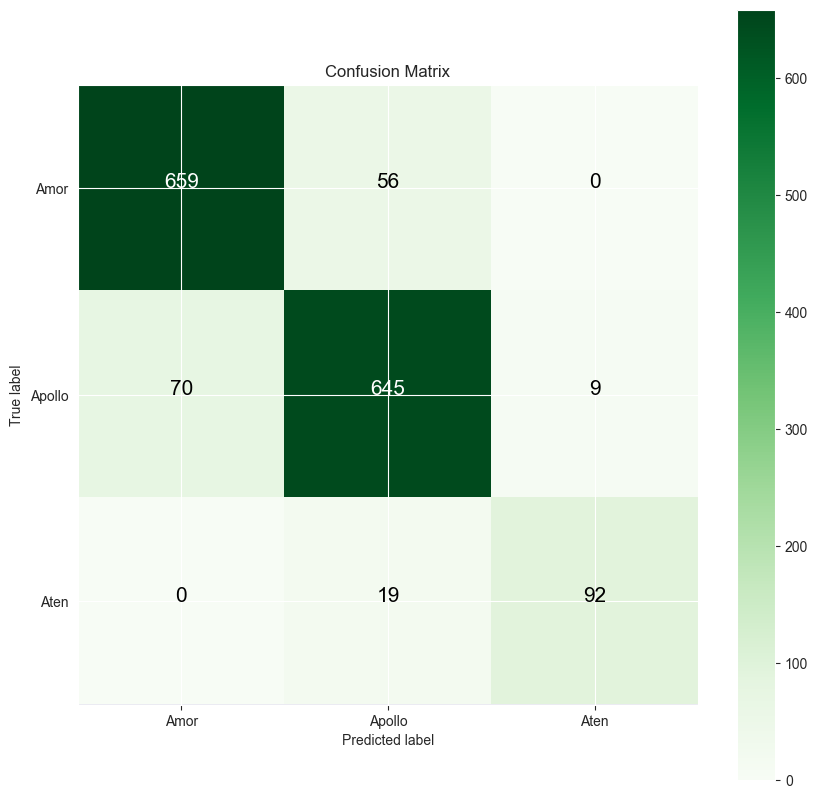

In [98]:
# Categorical Data
classification_confusion_evaluation(catg_y_test, catg_knn_pred, class_names)

==>Classification Report<==
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       733
           1       0.94      0.78      0.85       123
           2       0.90      0.93      0.92       694

    accuracy                           0.90      1550
   macro avg       0.91      0.87      0.89      1550
weighted avg       0.90      0.90      0.90      1550

==>Confusion Matrix<==
==>Model accuracy: 0.90


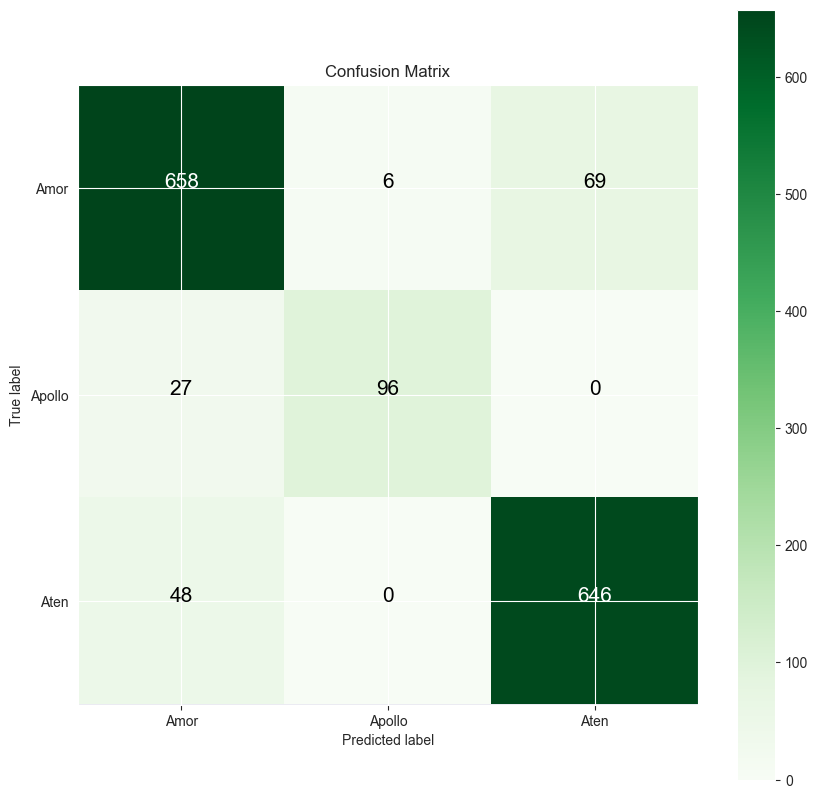

In [99]:
# Number Data
classification_confusion_evaluation(num_y_test, num_knn_pred, class_names)

In [100]:
# One-Hot Encoded Data
classification_confusion_evaluation(oneh_y_test, oneh_knn_pred, class_names)

==>Classification Report<==
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       747
           1       0.91      0.83      0.87       127
           2       0.91      0.93      0.92       676

   micro avg       0.91      0.91      0.91      1550
   macro avg       0.91      0.89      0.90      1550
weighted avg       0.91      0.91      0.91      1550
 samples avg       0.91      0.91      0.91      1550

==>Confusion Matrix<==
[[[ 736   67]
  [  75  672]]

 [[1413   10]
  [  21  106]]

 [[ 811   63]
  [  46  630]]]
==>Model accuracy: 0.91


D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       0.83      0.77      0.80       715
      Apollo       0.71      0.88      0.79       724
        Aten       0.00      0.00      0.00       111

    accuracy                           0.76      1550
   macro avg       0.52      0.55      0.53      1550
weighted avg       0.72      0.76      0.74      1550

==>Confusion Matrix<==
==>Model accuracy: 0.76


D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


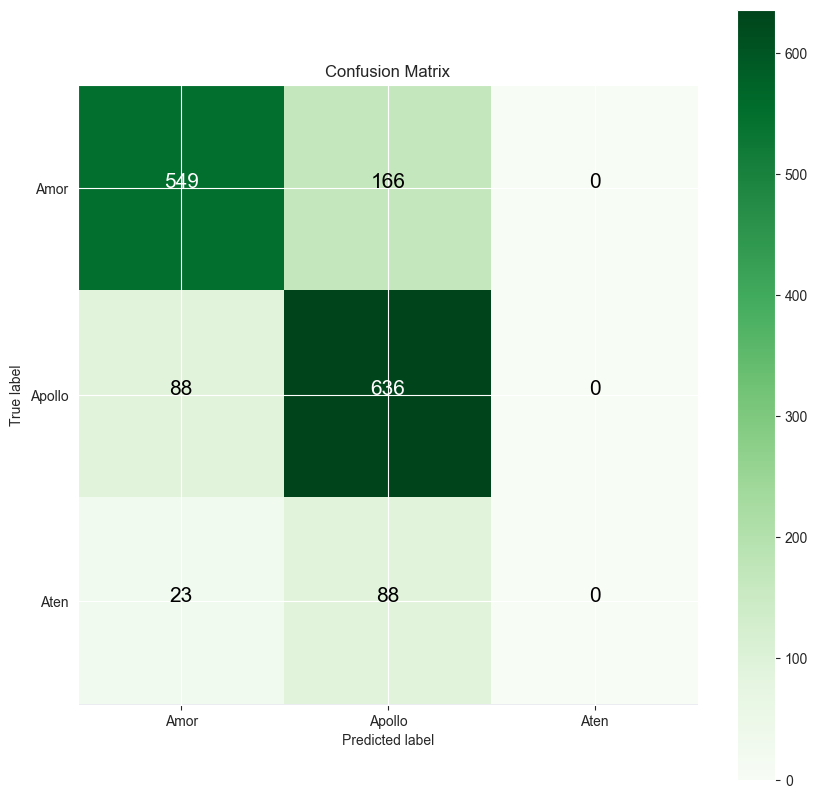

In [101]:
# Categorical Data
classification_confusion_evaluation(catg_y_test, catg_svm_pred, class_names)

==>Classification Report<==
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       733
           1       0.00      0.00      0.00       123
           2       0.81      0.95      0.87       694

    accuracy                           0.82      1550
   macro avg       0.54      0.59      0.57      1550
weighted avg       0.75      0.82      0.78      1550

==>Confusion Matrix<==
==>Model accuracy: 0.82


D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


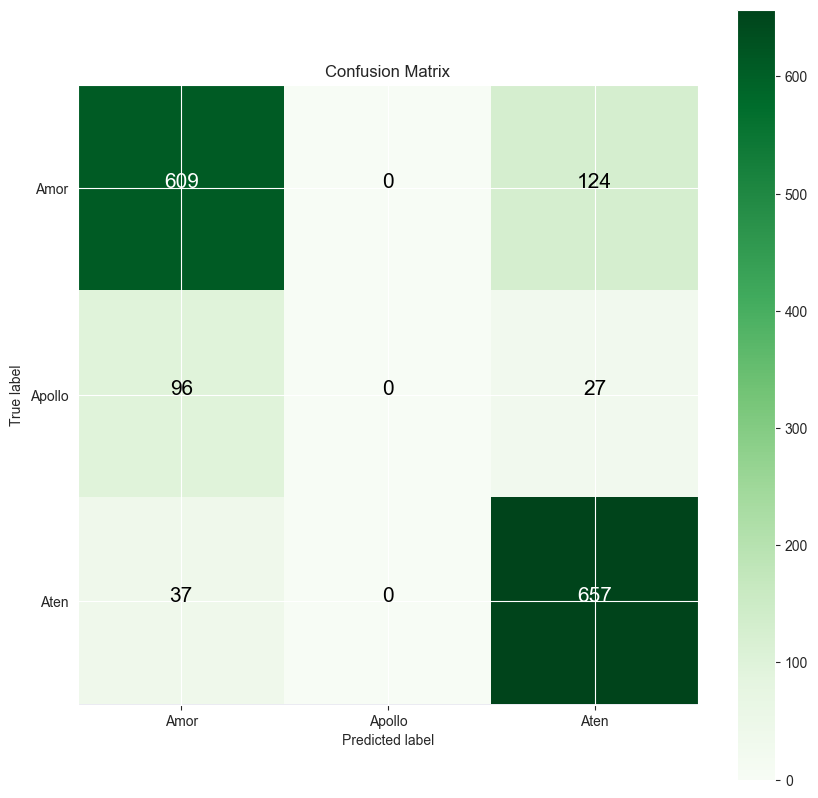

In [102]:
# Number Data
classification_confusion_evaluation(num_y_test, num_svm_pred, class_names)

In [103]:
# One-Hot Encoded Data
# classification_confusion_evaluation(oneh_y_test, oneh_svm_pred, class_names)

### GridSearch (SVM)

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       1.00      0.99      1.00       715
      Apollo       0.99      0.99      0.99       724
        Aten       0.99      0.99      0.99       111

    accuracy                           0.99      1550
   macro avg       0.99      0.99      0.99      1550
weighted avg       0.99      0.99      0.99      1550

==>Confusion Matrix<==
==>Model accuracy: 0.99


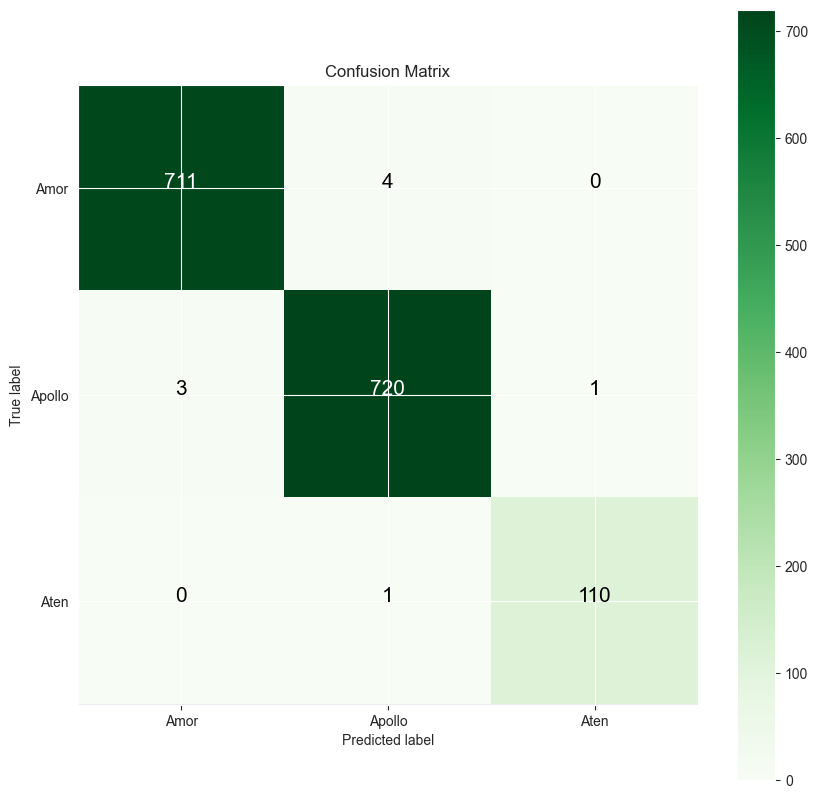

In [104]:
# Categorical Data
classification_confusion_evaluation(catg_y_test, catg_grid_pred, class_names)

==>Classification Report<==
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       733
           1       0.98      0.96      0.97       123
           2       1.00      0.99      0.99       694

    accuracy                           0.99      1550
   macro avg       0.99      0.98      0.99      1550
weighted avg       0.99      0.99      0.99      1550

==>Confusion Matrix<==
==>Model accuracy: 0.99


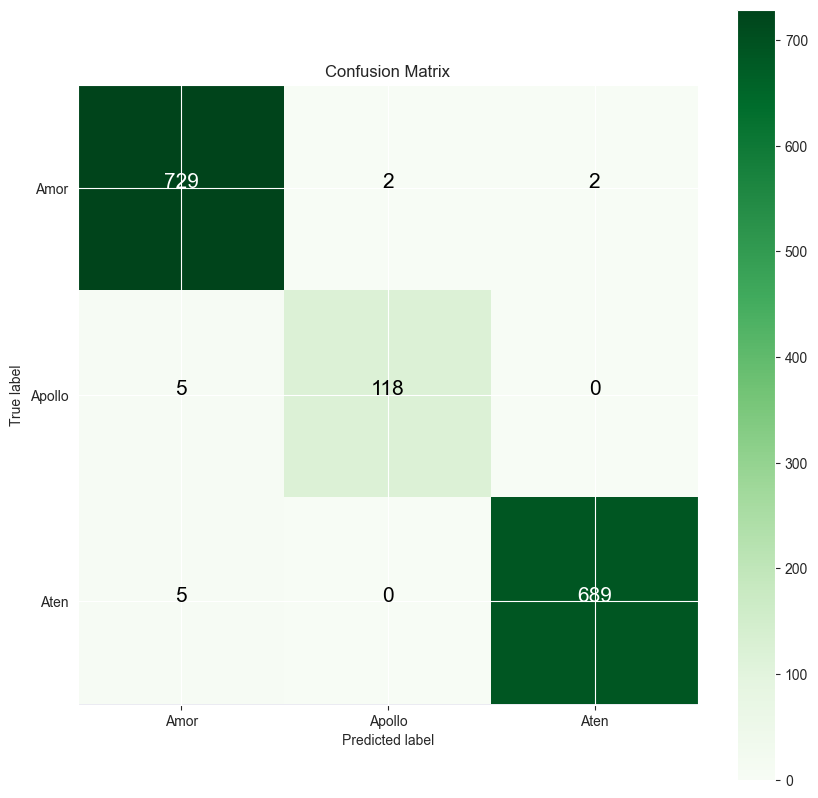

In [105]:
# Number Data
classification_confusion_evaluation(num_y_test, num_grid_pred, class_names)

In [106]:
# One-Hot Encoded Data
# classification_confusion_evaluation(oneh_y_test, oneh_grid_pred, class_names)

### Best model is GridSearch (SVM) model with Categorical Data

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       1.00      0.99      1.00       715
      Apollo       0.99      0.99      0.99       724
        Aten       0.99      0.99      0.99       111

    accuracy                           0.99      1550
   macro avg       0.99      0.99      0.99      1550
weighted avg       0.99      0.99      0.99      1550

==>Confusion Matrix<==
==>Model accuracy: 0.99


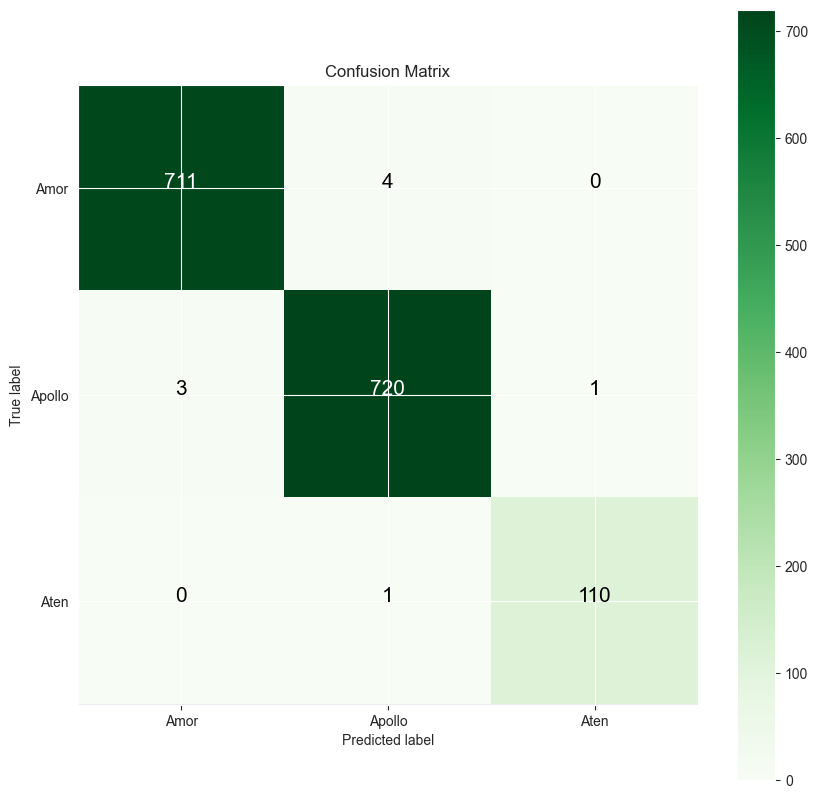

In [107]:
# Categorical Data
classification_confusion_evaluation(catg_y_test, catg_grid_pred, class_names)